<h1><center><font size=10 color="green">Project 6 - AllLife Bank Customer Segmentation</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

<h1><b><font size=3>Objective</font></b></h1>

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

<h1><b><font size=3>Data Dictionary</font></b></h1>

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# 2. Frame Problem

Key information from the problem statement - 
1. To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank.
2. Create customer groups / segments.
3. Provide recommendations to the bank on how to better market to and service these customers.

Towards that, the expectation is to create a Machine Learning Model that will help create customer segmentation.

There is no dependent feature in this case that the model will be evaluated with and predict. Hence, this is a use case of <b> Unsupervised Machine Learning Model.</b>

We will below models to create customer segments -

<b><font color="blue"> K-means Clustering

<b><font color="blue"> Hierarchical Clustering

<b><font color="blue"> Use above models with Principal Component Analysis (PCA)

Compare clusters obtained from K-means and Hierarchical clustering techniques.
Choose the best model that provides best clusters.


# 3. Identify Model Evaluation Metrics

As Clustering is an Unsupervised Machine Learning model, there are no labels, hence the correctness of the clustering results can't really be completely validated. However, we will use below metrics - 

1. <b><font color="blue">Silhouette score (for k-means model)</b>

With k-means model, this is one of the methods for evaluating the quality of clusters created using clustering algorithms. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

Silhouette score near +1 indicate that the sample is far away from the neighboring clusters. Silhouette score near -1 indicate that those samples might have been assigned to the wrong cluster. Score closer to 1 is good.Sil Score

2. <b><font color="blue"> Silhouette Visualizer (for k-means model) </b>

Use below guidelines to interpret and decide based on Silhouette Visualizer
Every cluster needs to satisfy for selecting the optimal K-value -

* Horizontal line refers to the Silhouette score of each cluster.There should be no negative silhouette score for any cluster
* All the clusters should cross the avg silhouette score. Dotted red line is an Average Silhouette score.
* All the clusters should have the different variations (width). Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
* All the clusters should have different silhouette score

3. <b><font color="blue"> Cophenetic correlation (for hierarchical model) </b>

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. More the value, better the model and resulting clusters.

# 4. Reusable Custom Functions

None for this project

# 5. Import Required libraries

In [ ]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# # To split the data into train and test
# from sklearn.model_selection import train_test_split

# # To build linear regression_model
# #from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy.stats import zscore

# # For boxcox
# from scipy.stats import boxcox 
# from sklearn.preprocessing import PowerTransformer

# # To build Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# # To build Logistic Regression
# from sklearn.linear_model import LogisticRegression

# # For Decision Tree Hyperparameter Tuning, Pre-pruning
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Import Metrics
# from sklearn import metrics

# # To get diferent metric scores
# from sklearn.metrics import (
#     f1_score,
#     accuracy_score,
#     recall_score,
#     precision_score,
#     confusion_matrix,
#     roc_auc_score,
#     plot_confusion_matrix,
#     precision_recall_curve,
#     roc_curve,
#     make_scorer,
#     r2_score
# )

# # For Ensemble Techniques

# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# #To install xgboost library use - !pip install xgboost 
# from xgboost import XGBClassifier

# # Importing Simple Imputer to treat the null values
# from sklearn.impute import SimpleImputer

# # for imbalanced data, to undersample and oversample the data
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # to create k folds of data and get cross validation score
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import cross_val_score

# # To do one-hot encoding
# from sklearn.preprocessing import OneHotEncoder

# # To be used for creating pipelines and personalizing them
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# For Clustering,to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

In [ ]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 6. Import Dataset

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

#This line was used with Google Colab
df=pd.read_excel('/content/drive/My Drive/AI-ML/Module6_UnsupervisedLearning/Project-6/Credit_Card_Customer_Data.xlsx')

df_orig_copy=df.copy()

In [ ]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [ ]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the dataset. 
This includes - 

1. Check number of rows and columns
2. Check data types
3. Duplicate records
4. Missing value counts
5. Statisitcal summary

In [ ]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 660 
 Columns: 7


In [ ]:
# Check for duplicate rows

df.duplicated().sum()

0

No duplicate records.

In [ ]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.dtypes.value_counts()

int64    7
dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
df.select_dtypes(include='int').columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
df.select_dtypes(include='float').columns

Index([], dtype='object')

Data types - 

* Numeric Features (Integer) - 'Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', Total_calls_made'

* Numeric Features (Float) - None

* Object Features - None

In [ ]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are NO missing values for any features.

In [ ]:
df.describe(include='all')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000
mean,330.5000,55141.4439,34574.2424,4.7061,2.4030,2.6061,3.5833
std,190.6699,25627.7722,37625.4878,2.1678,1.6318,2.9357,2.8653
min,1.0000,11265.0000,3000.0000,1.0000,0.0000,0.0000,0.0000
25%,165.7500,33825.2500,10000.0000,3.0000,1.0000,1.0000,1.0000
50%,330.5000,53874.5000,18000.0000,5.0000,2.0000,2.0000,3.0000
75%,495.2500,77202.5000,48000.0000,6.0000,4.0000,4.0000,5.0000
max,660.0000,99843.0000,200000.0000,10.0000,5.0000,15.0000,10.0000


In [ ]:
# Check Unique values for int columns

for column in df.select_dtypes(include='int').columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print("-" * 50)

For Sl_No, there are 660 values in the main dataset 

--------------------------------------------------
For Customer Key, there are 655 values in the main dataset 

--------------------------------------------------
For Avg_Credit_Limit, there are 110 values in the main dataset 

--------------------------------------------------
For Total_Credit_Cards, there are 10 values in the main dataset 

--------------------------------------------------
For Total_visits_bank, there are 6 values in the main dataset 

--------------------------------------------------
For Total_visits_online, there are 16 values in the main dataset 

--------------------------------------------------
For Total_calls_made, there are 11 values in the main dataset 

--------------------------------------------------


There are 655 Customer Key values for 660 records, indicating that there are 5 duplicate values.
Let's check them.

In [ ]:
df['Customer Key'].value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

Customer Keys that have multiple records - 
      97935
      50706
      47437
      37252
      96929

In [ ]:
# Example of some duplicate values for Customer Key.
df[df['Customer Key'] == 97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Per Project FAQs - The 'Customer Key' is a unique ID given to each customer in the database. The duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time. The column can be dropped during the analysis.

As Sl_No and Customer Key are unique identifiers for each record, it will not help train model, We will drop it at this stage.

In [ ]:
# Drop features that will not add value to the model
# As Sl_No and Customer Key are unique identifiers for each record, it will not help train model

df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


Observations on the dataset

1. Dataset has 660 rows and 7 features

2. No duplicate rows seen. However, there are duplicate Customer Key values for different records. Looks like these are records for the same customer at different point in time.

3. Data types - 

  * Numeric Features (Integer) - 'Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', Total_calls_made'

4. Features 
  
  * Sl_No - Unique identifier of a record

  * Customer Key - Unique identifier of a customer. There are 5 records with multiple Customer Key values.

  * Avg_Credit_Limit - Average credit limit of each customer for all credit cards. Significant range for values, 3000 to 200000. Looks like outliers will exist.

  * Total_Credit_Cards - Total number of credit cards possessed by the customer. 10 distinct values, range from 1 to 10, median is 5
  
  * Total_visits_bank - Total number of visits that customer made (yearly) personally to the bank. Ranges from 0 to 5, average little above 2, median is 2 as well.

  * Total_visits_online - Total number of visits or online logins made by the customer (yearly). Ranges from 0 to 15. 75% of the customers visit <= 4 times.

  * Total_calls_made - Total number of calls made by the customer to the bank or its customer service department (yearly). Ranges from 0 to 10. 75% of the customers visit <= 5 times.

# 8. Perform Exploratory Data Analysis (EDA)

Purpose of this analysis is find more details about individual features and its characteristics. 

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Note observations / insights

## 8a. EDA - Univariate Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

### 8a.1. Avg_Credit_Limit

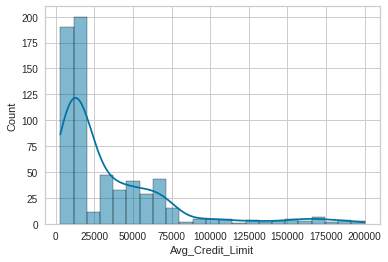

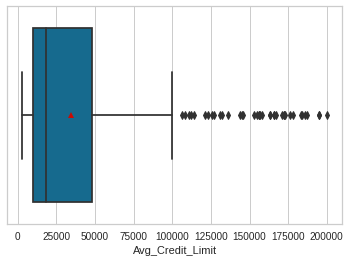

In [ ]:
# Use histplots to see distribution for Avg_Credit_Limit

sns.histplot(data=df,x='Avg_Credit_Limit', kde=True)
plt.show()

sns.boxplot(data=df,x='Avg_Credit_Limit', showmeans=True)
plt.show()

* Right skewed distribution
* Several upper outiers that need to be investigated
* 75% of the customers have Avg Credit Limit less than 50000. But there are sizable number of customers having more than 50000 credit limit.

### 8a.2. Total_Credit_Cards

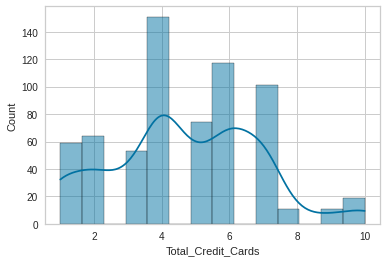

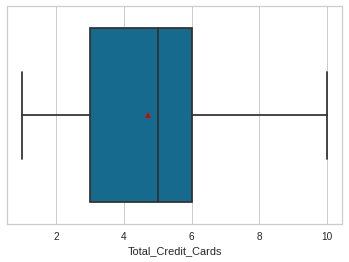

In [ ]:
# Use histplots to see distribution for Total_Credit_Cards

sns.histplot(data=df,x='Total_Credit_Cards', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Credit_Cards', showmeans=True)
plt.show()

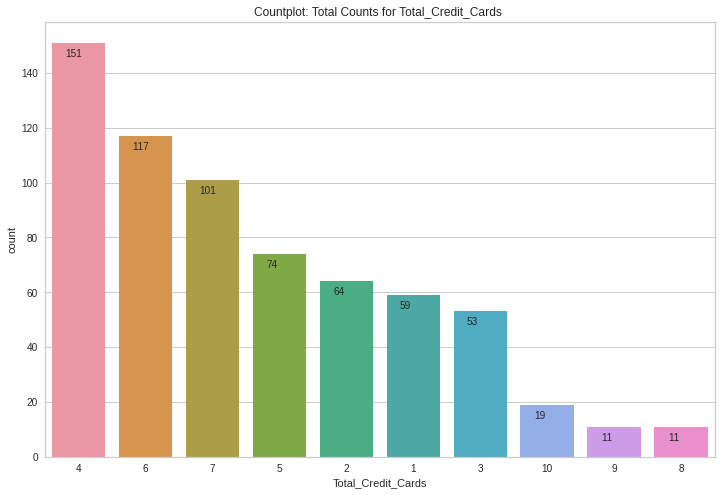

In [ ]:
# Use Countplot to see the distribution of Total_Credit_Cards.

Temp_v='Total_Credit_Cards'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Multi-modal distribution, with modes on 4 & 6
* No outliers
* 50% of the customers have between 3 & 6 credit cards, median number of credit cards is 5

### 8a.3. Total_visits_bank

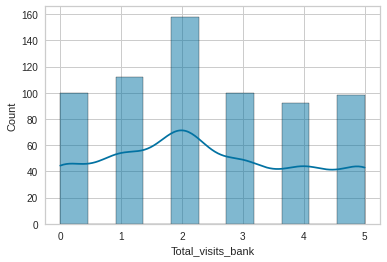

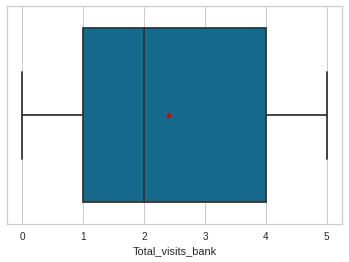

In [ ]:
# Use histplots to see distribution for Total_visits_bank

sns.histplot(data=df,x='Total_visits_bank', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_visits_bank', showmeans=True)
plt.show()

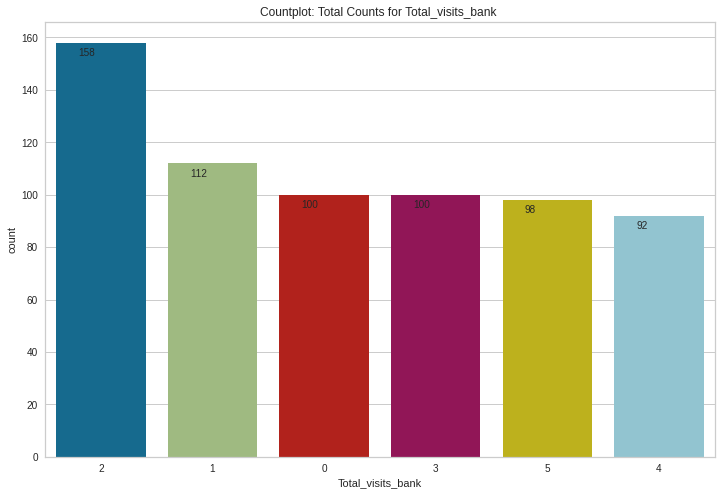

In [ ]:
# Use Countplot to see the distribution of Total_visits_bank.

Temp_v='Total_visits_bank'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Most number of customers visit at least 2 times

### 8a.4. Total_visits_online

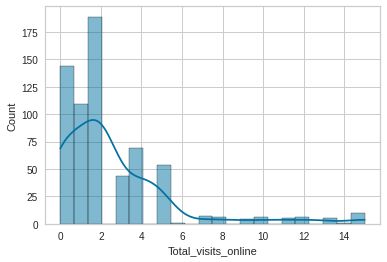

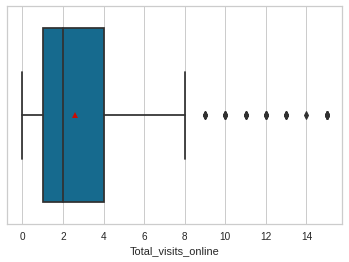

In [ ]:
# Use histplots to see distribution for Total_visits_online

sns.histplot(data=df,x='Total_visits_online', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_visits_online', showmeans=True)
plt.show()

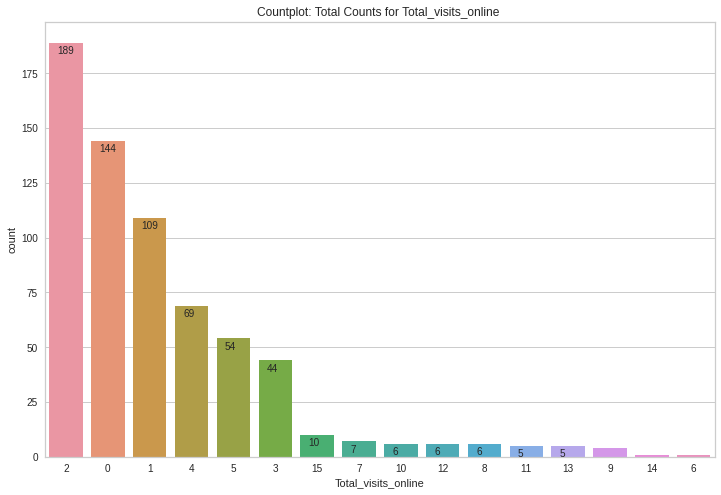

In [ ]:
# Use Countplot to see the distribution of Total_visits_online.

Temp_v='Total_visits_online'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Right skewed distribution
* Majority of the customers visit online <= 5 times
* There are some outliers as customers have visited more than 8 times. However, considering that these are number of online visits in an year, even maximum number of 15 seems legit.

### 8a.5. Total_calls_made

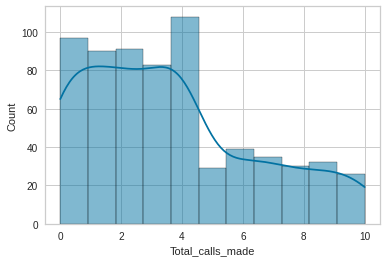

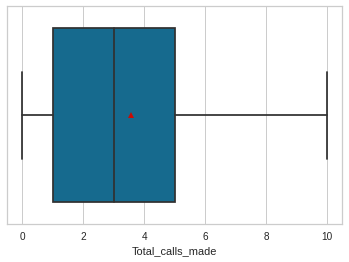

In [ ]:
# Use histplots to see distribution for Total_calls_made

sns.histplot(data=df,x='Total_calls_made', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_calls_made', showmeans=True)
plt.show()

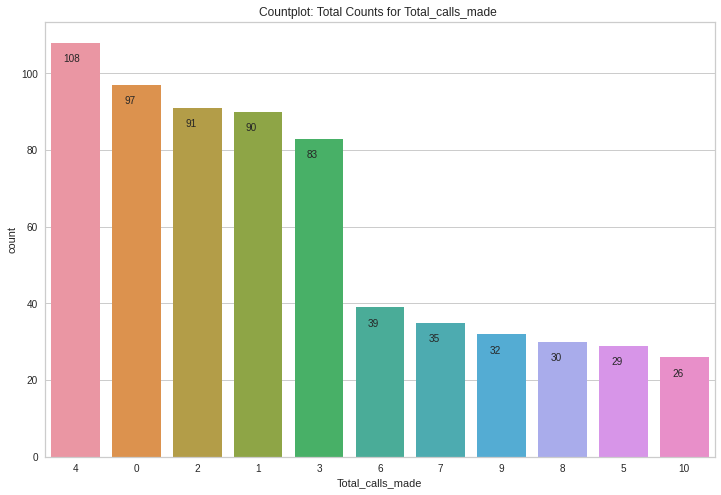

In [ ]:
# Use Countplot to see the distribution of Total_calls_made.

Temp_v='Total_calls_made'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Majority of the customers have called <= 4 times
* Some customers have never called, range is from 0 to 10

## 8b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

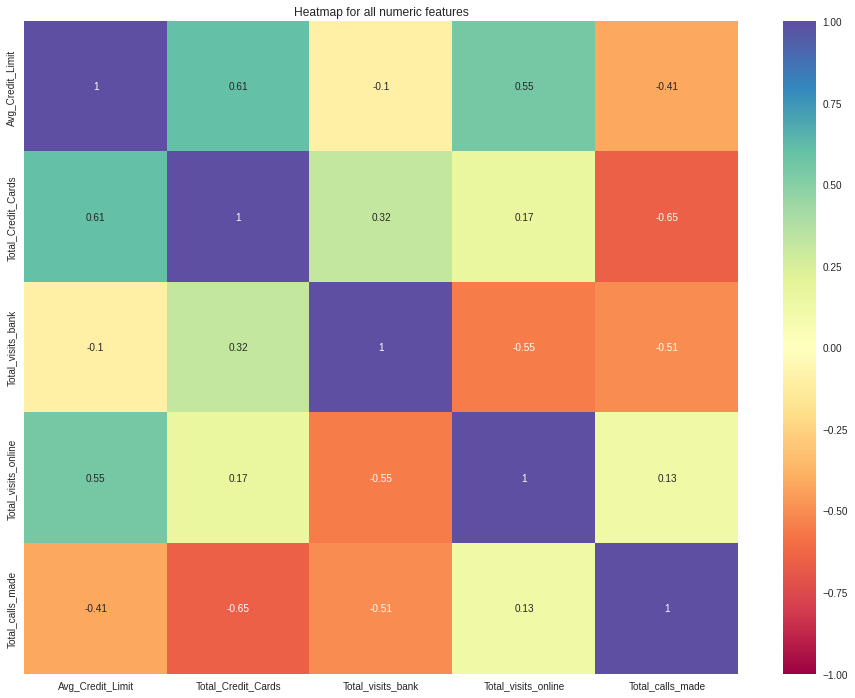

In [ ]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(16,12))
plt.title('Heatmap for all numeric features')

sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observations

1. No strong corelations (>= 0.7 absolute value) exist between any features.
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

	a. Avg_Credit_Limit & Total_Credit_Cards - Logical, as each credit card will have some credit limit.

	b. Avg_Credit_Limit  & Total_visits_online - Seems incidental.

	c. Total_Credit_Cards & Total_calls_made - Negative corelation. Seems incidental.

	d. Total_visits_bank & Total_visits_online - Negative corelation. Seems logical, more business conducted online, lesser need to visit in person.

	e. Total_visits_bank & Total_calls_made - Negative corelation. Seems logical, more business conducted by phone, lesser need to visit in person.

Let's check how Avg_Credit_Limit is related to other features.

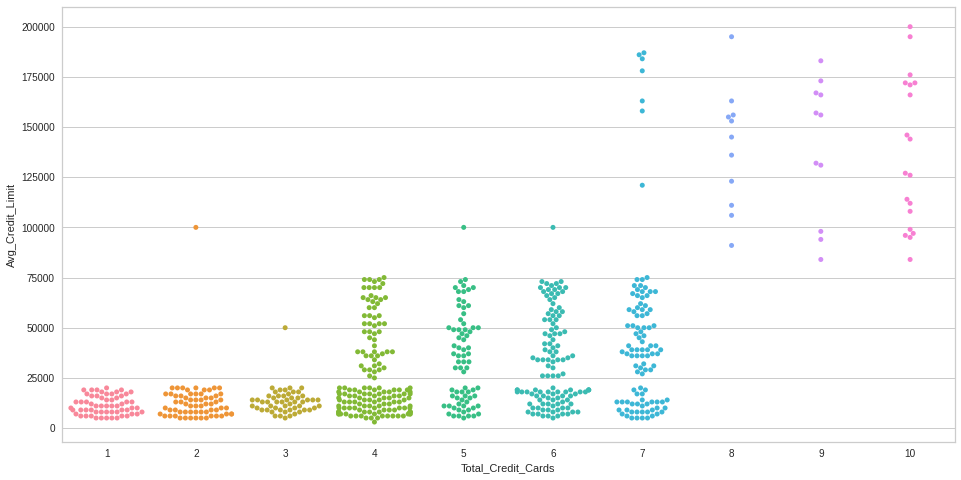

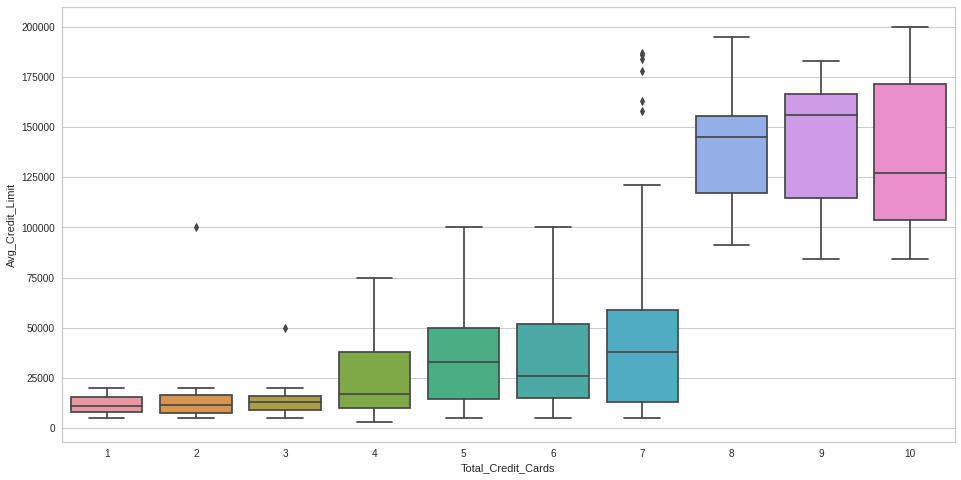

In [ ]:
# Create swarmplot for Avg_Credit_Limit and Total_Credit_Cards.  

plt.figure(figsize=(16,8))
sns.swarmplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_Credit_Cards', y='Avg_Credit_Limit')
plt.show()

* As expected, as number of credit cards increase, range for Avg Credit Limit increases. 
* As number of cards increase, range in the Avg Credit Limit increases as well. For example, range for credit cards = 10 is way more than range when credit cards = 1 or 2

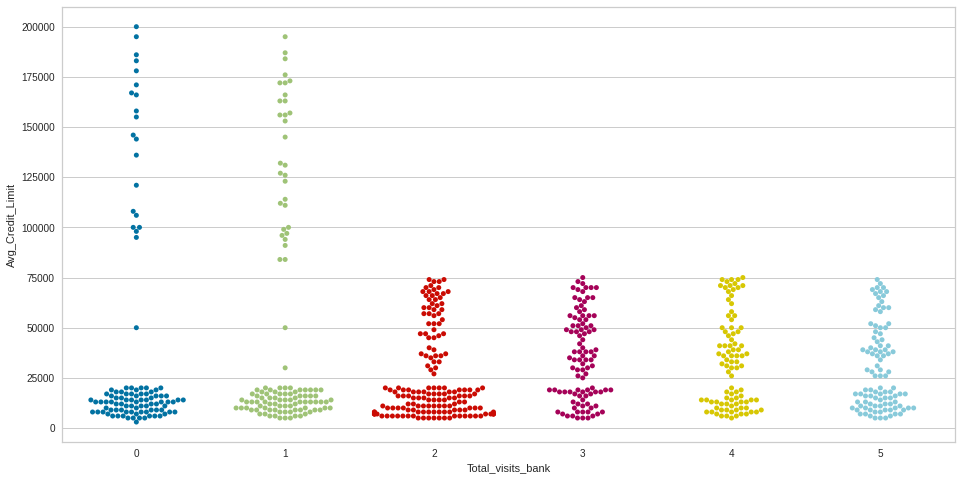

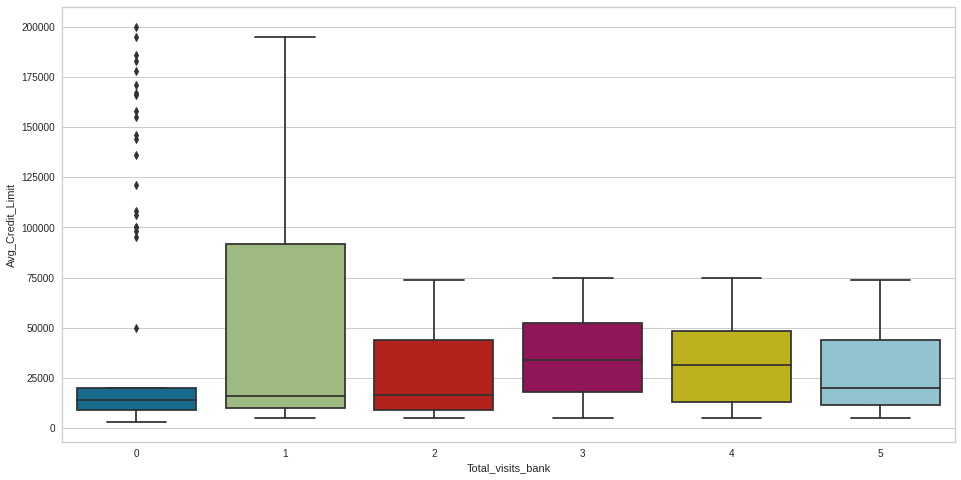

In [ ]:
# Create swarmplot for Avg_Credit_Limit and Total_visits_bank.  

plt.figure(figsize=(16,8))
sns.swarmplot(data=df, x='Total_visits_bank', y='Avg_Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_visits_bank', y='Avg_Credit_Limit')
plt.show()

* Distribution of Avg Credit Limit seems very similar for bank visits of 2 or more.
* For customers visiting 0 or 1 times however, avg credit limit values are higher.
* All outliers for avg credit limit are for customers not visiting the bank.

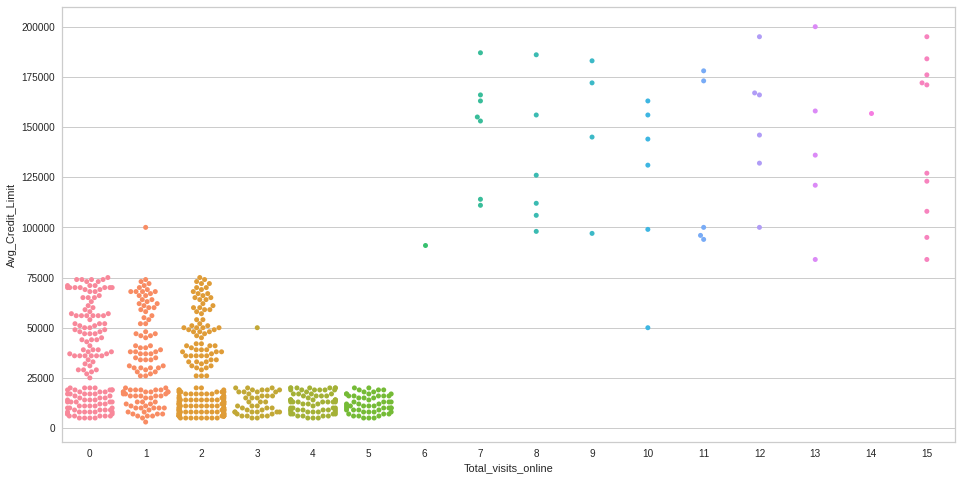

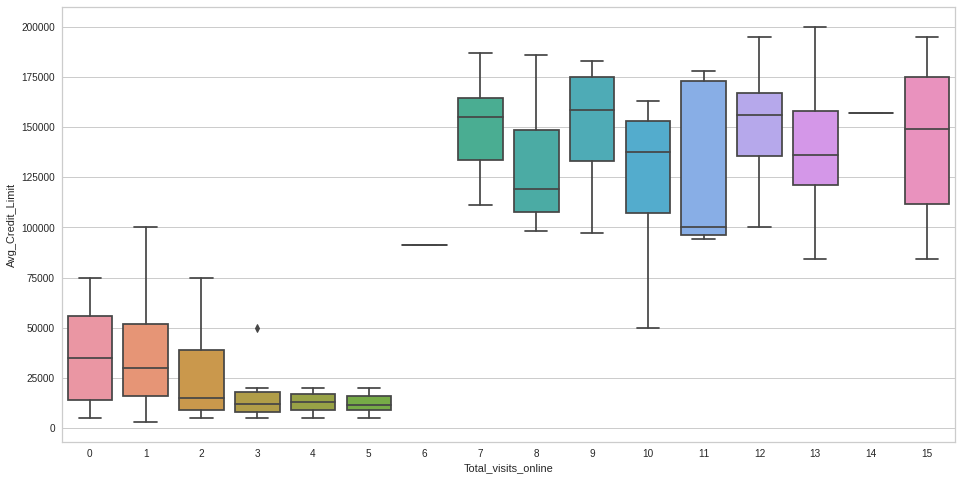

In [ ]:
# Create stripplot for Avg_Credit_Limit and Total_visits_online.  

plt.figure(figsize=(16,8))
sns.swarmplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_visits_online', y='Avg_Credit_Limit')
plt.show()

* Very few customers have total visits online more than 6. However, they seem to have higher avg credit limit. Or other way, people with higher credit limits have more need to visit online.


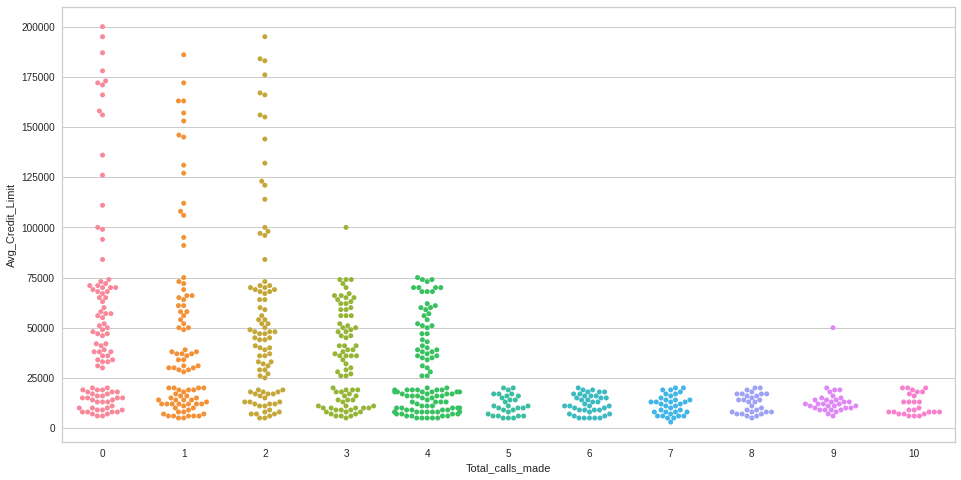

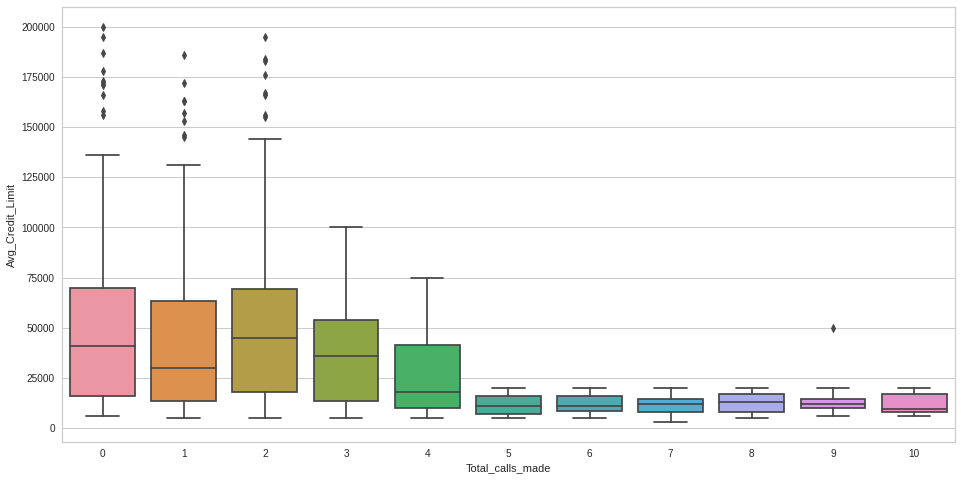

In [ ]:
# Create stripplot for Avg_Credit_Limit and Total_calls_made.  

plt.figure(figsize=(16,8))
sns.swarmplot(data=df, x='Total_calls_made', y='Avg_Credit_Limit');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_calls_made', y='Avg_Credit_Limit')
plt.show()

* Customers who have higher avg credit limits have made smaller number of calls. Customers who made 4 or lesser calls have significantly higher avg credit limit.

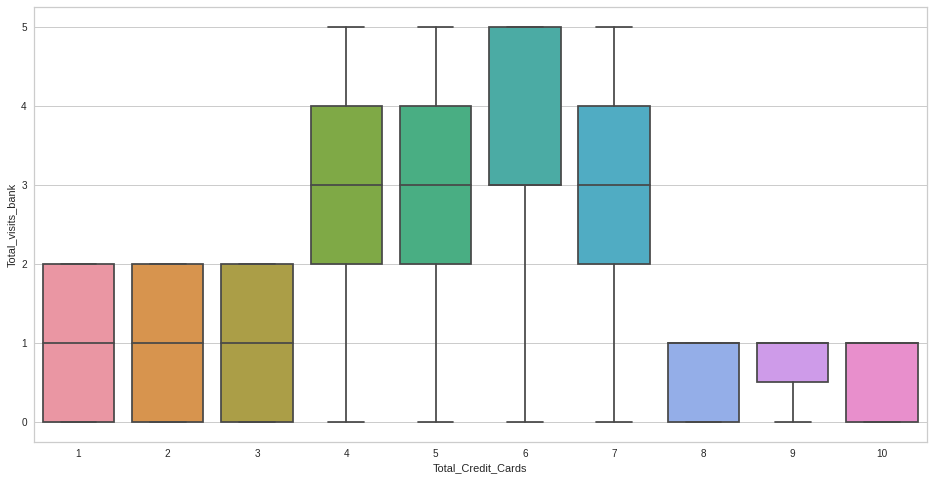

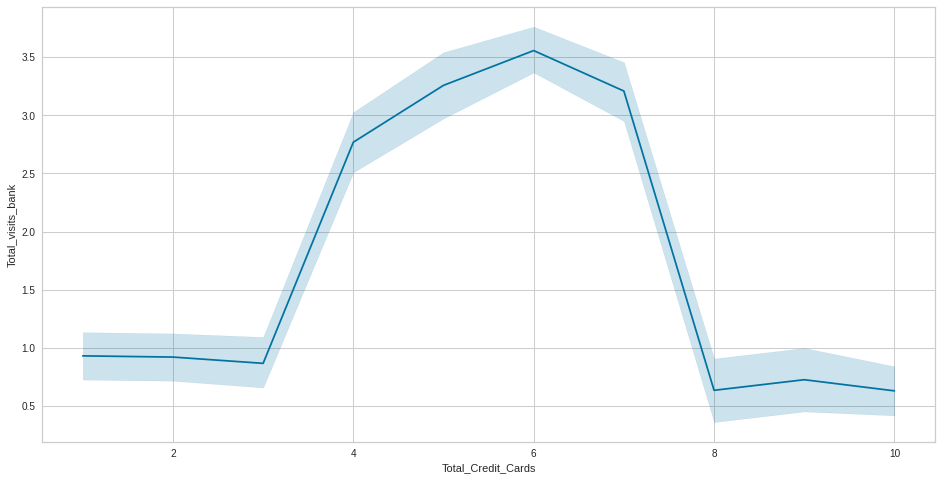

In [ ]:
# Create stripplot for Total_visits_bank and Total_Credit_Cards.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_Credit_Cards', y='Total_visits_bank')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_Credit_Cards', y='Total_visits_bank')
plt.show()

* No specific pattern observed

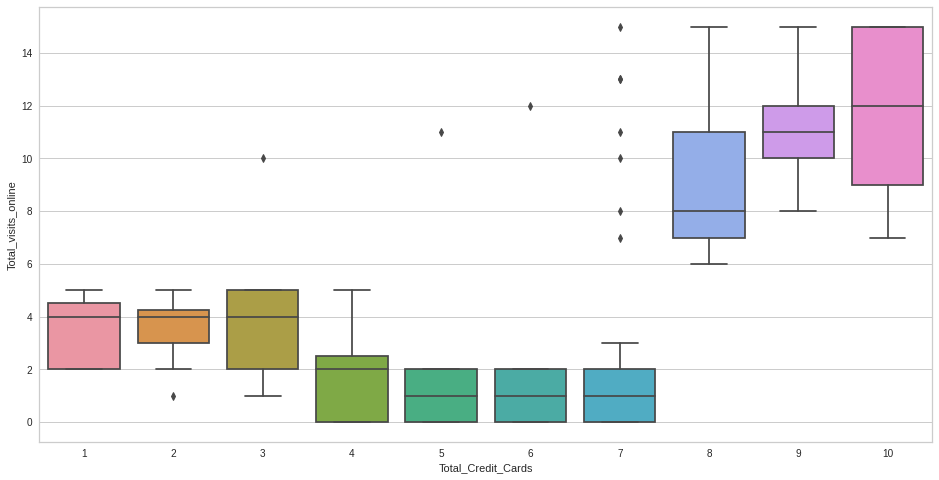

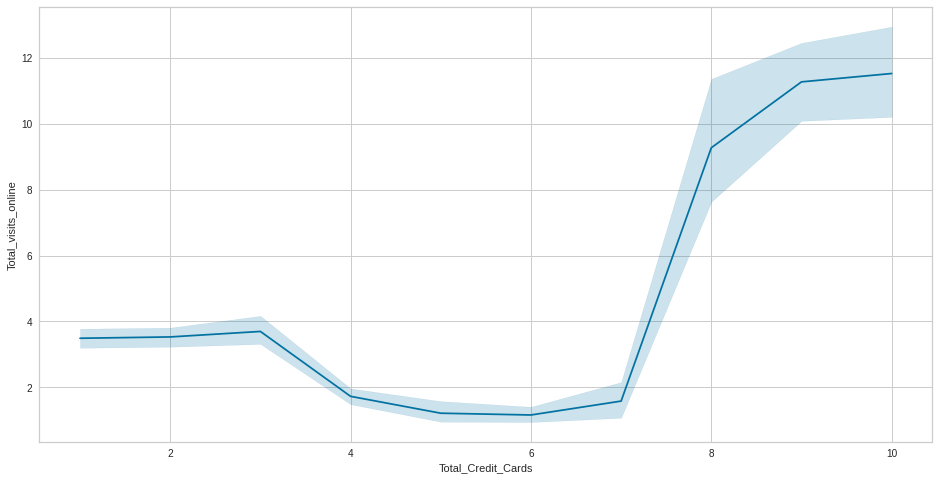

In [ ]:
# Create stripplot for Total_Credit_Cards and Total_visits_online.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_Credit_Cards', y='Total_visits_online')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_Credit_Cards', y='Total_visits_online')
plt.show()

* Customers with higher number of credit cards (8 or more) have made higher online visits.

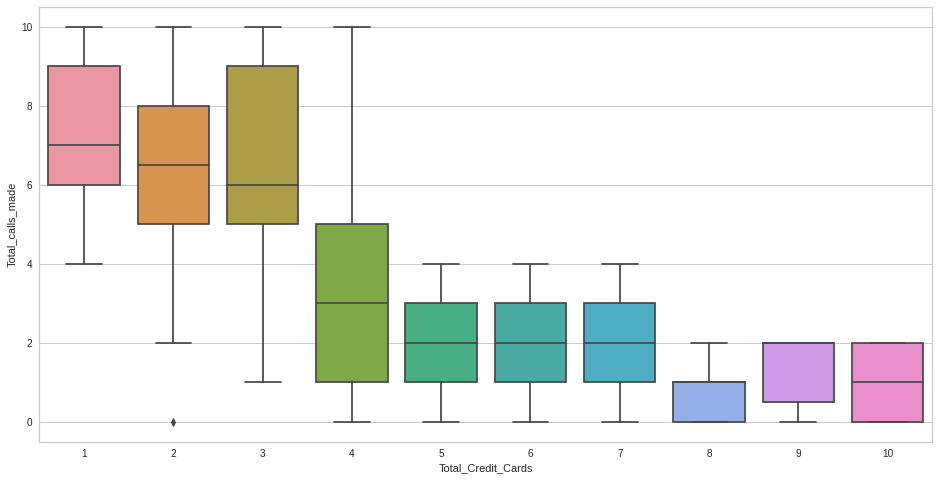

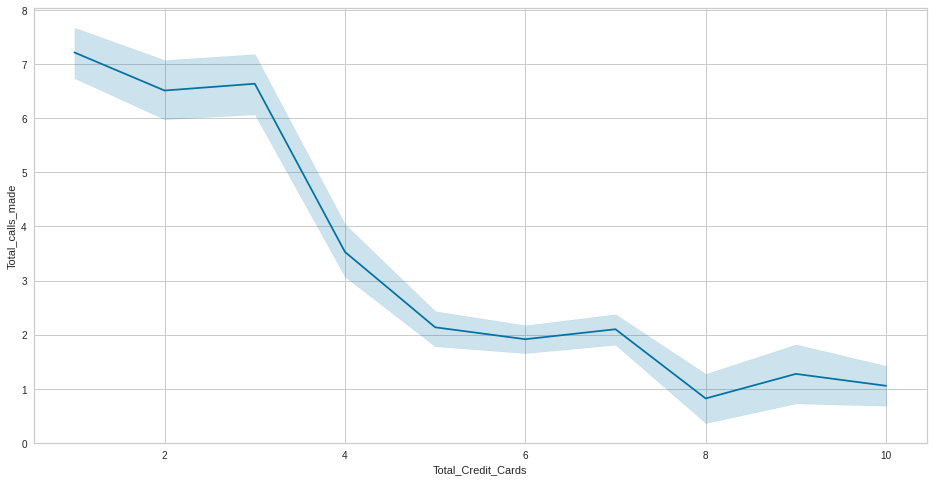

In [ ]:
# Create stripplot for Total_calls_made and Total_Credit_Cards.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_Credit_Cards', y='Total_calls_made')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_Credit_Cards', y='Total_calls_made')
plt.show()

* Inverse relationship, more the number of credit cards, lesser number of calls made

* Ratio of transaction counts between Q4 and Q1 is smaller for attrited customers

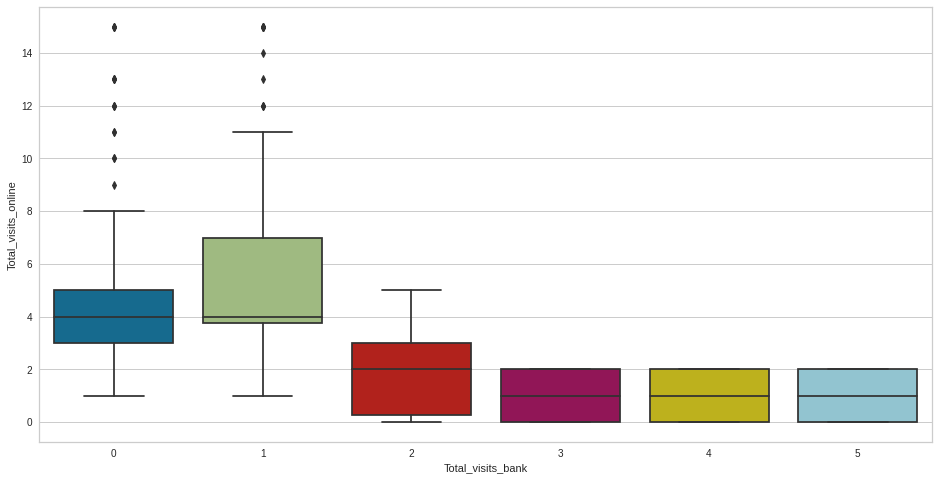

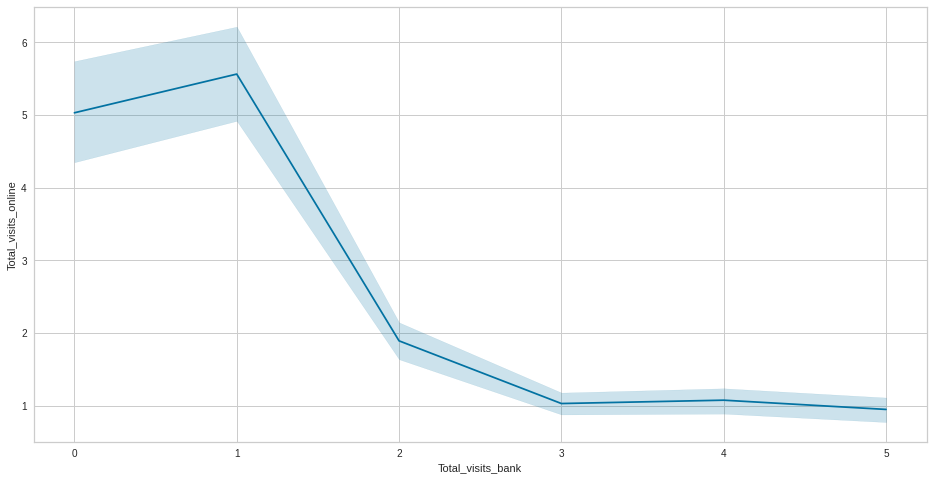

In [ ]:
# Create stripplot for Total_visits_bank and Total_visits_online.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_visits_bank', y='Total_visits_online')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_visits_bank', y='Total_visits_online')
plt.show()

* More the number of visits online, lesser number of bank visits

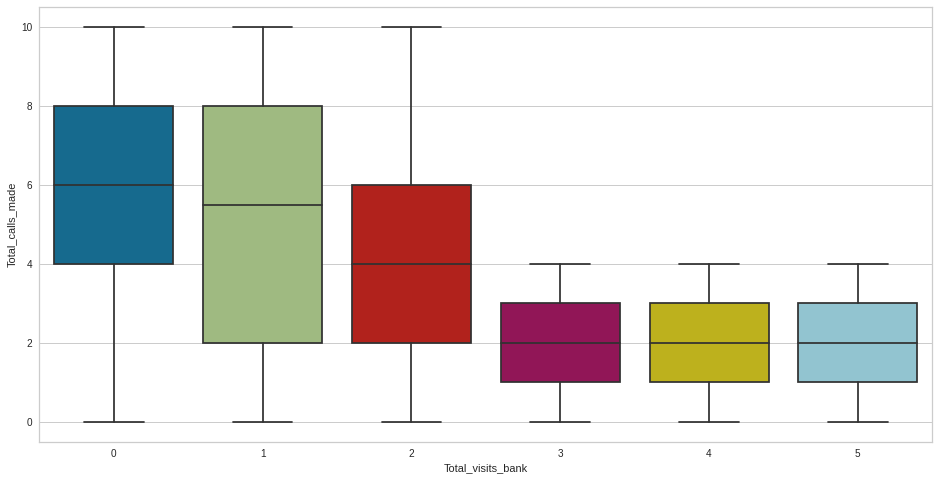

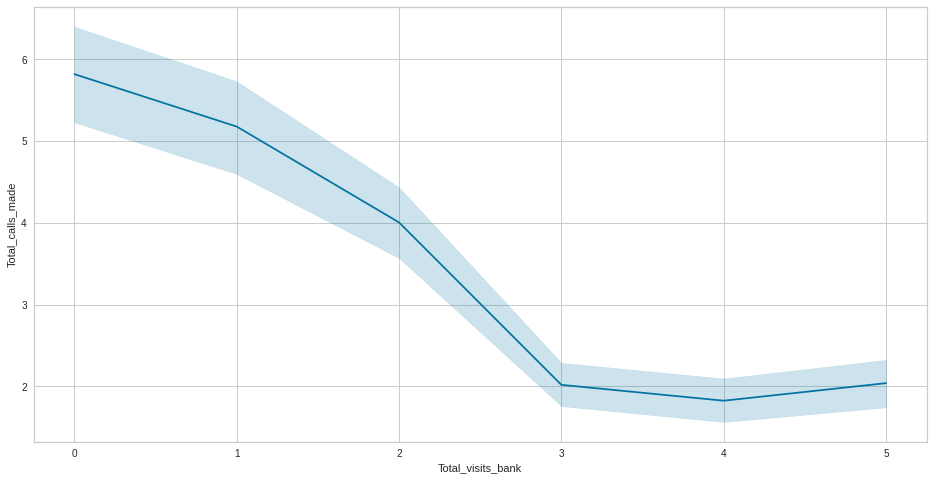

In [ ]:
# Create stripplot for Total_visits_bank and Total_calls_made.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_visits_bank', y='Total_calls_made')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_visits_bank', y='Total_calls_made')
plt.show()

* As Bank visits number go up, lesser number of total calls made. Looks like certain customers prefer bank visits rather than other means of getting in touch with the bank.

Let's review corelation between Gender and some relevant continuous features

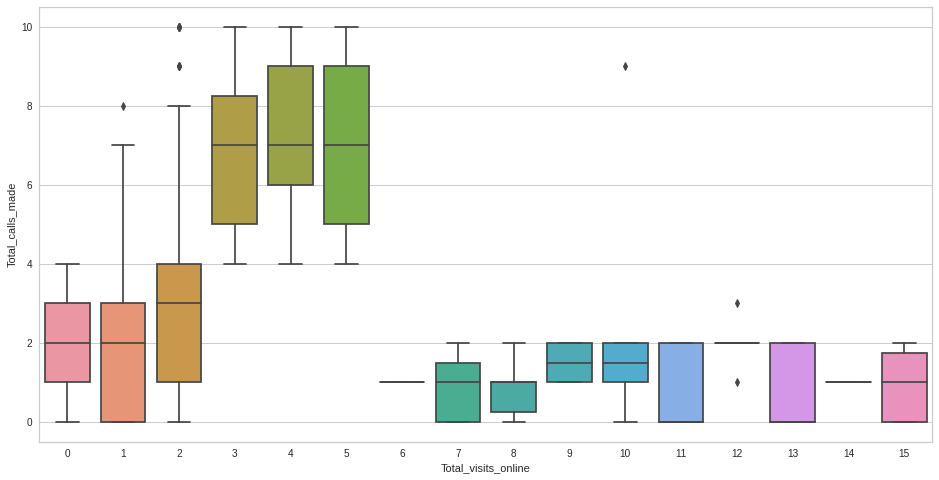

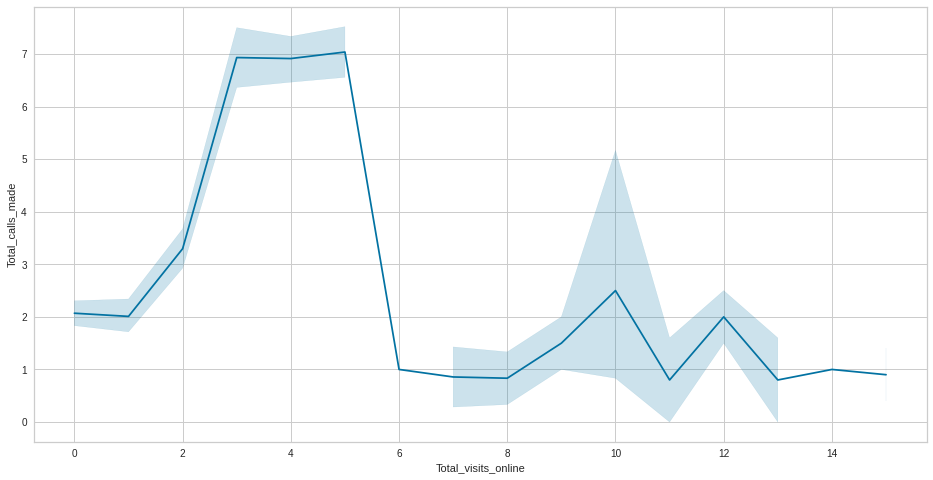

In [ ]:
# Create stripplot for Total_visits_online and Total_calls_made.  

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Total_visits_online', y='Total_calls_made')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='Total_visits_online', y='Total_calls_made')
plt.show()

* No specific pattern observed

## 8c. EDA - Insights Summary

### Univariate Analysis

1. Avg_Credit_Limit

	* Left skewed distribution
	* Several upper outiers that need to be investigated
	* 75% of the customers have Avg Credit Limit less than 50000. But there are sizable number of customers having more than 50000 credit limit.


2. Total_Credit_Cards

	* Multi-modal distribution, with modes on 4 & 6
	* No outliers
	* 50% of the customers have between 3 & 6 credit cards, median number of credit cards is 5


3. Total_visits_bank
	* Most number of customers visit at least 2 times


4. Total_visits_online

	* Left skewed distribution
	* Majority of the customers visit online <= 5 times
	* There are some outliers as customers have visited more than 8 times. However, considering that these are number of visits in an year, even maximum number of 15 seems legit.


5. Total_calls_made
	* Majority of the customers have called <= 4 times
	* Some customers have never called, range is from 0 to 10


### Multivariate Analysis


1. No strong corelations (>= 0.7 absolute value) exist between any features.
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

	a. Avg_Credit_Limit & Total_Credit_Cards - Logical, as each credit card will have some credit limit.

	b. Avg_Credit_Limit  & Total_visits_online - Seems incidental.

	c. Total_Credit_Cards & Total_calls_made - Negative corelation. Seems incidental.

	d. Total_visits_bank & Total_visits_online - Negative corelation. Seems logical, more business conducted online, lesser need to visit in person.

	e. Total_visits_bank & Total_calls_made - Negative corelation. Seems logical, more business conducted by phone, lesser need to visit in person

3. As expected, as number of credit cards increase, range for Avg Credit Limit increases. 

4. As number of cards increase, range in the Avg Credit Limit increases as well. For example, range for credit cards = 10 is way more than range when credit cards = 1 or 2

5. Distribution of Avg Credit Limit seems very similar for bank visits of 2 or more.

6. For customers visiting 0 or 1 times however, avg credit limit values are higher.

7. All outliers for avg credit limit are for customers not visiting the bank.

8. Very few customers have total visits online more than 6. However, they seem to have higher avg credit limit. Or other way, people with higher credit limits have more need to visit online.

9. Customers who have higher avg credit limits have made smaller number of calls. Customers who made 4 or lesser calls have significantly higher avg credit limit.

10. Customers with higher number of credit cards (8 or more) have made higher online visits.

11. Inverse relationship, more the number of credit cards, lesser number of calls made

12. More the number of visits online, lesser number of bank visits

13. As Bank visits number go up, lesser number of total calls made. Looks like certain customers prefer bank visits rather than other means of getting in touch with the bank.

# 9. Perform Data Pre-processing

This includes - 
1. Datatype conversions
2. Correct values if any incorrect values are present
3. Transform data to fix any discrepancies in Units of measures or any formatting issues
4. Identify outliers for numeric features and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or capping the value or replacing the values by median / mode / mean of the dataset
5. Identify missing values and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or replacing the values by median / mode / mean of the dataset
6. Feature Engineering if / as needed
7. Feature Scaling if / as needed

## Avg_Credit_Limit

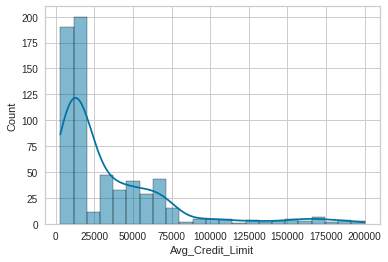

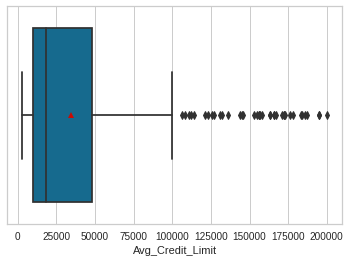

In [ ]:
# Use histplot and boxplot to see distribution for Avg_Credit_Limit

sns.histplot(data=df,x='Avg_Credit_Limit', kde=True)
plt.show()

sns.boxplot(data=df,x='Avg_Credit_Limit', showmeans=True)
plt.show()

In [ ]:
# Calculate quantile and IQR values for Avg_Credit_Limit

Temp_v = 'Avg_Credit_Limit'
Temp_q1_Avg_Credit_Limit = df[Temp_v].quantile(0.25)
Temp_q2_Avg_Credit_Limit = df[Temp_v].quantile(0.5)
Temp_q3_Avg_Credit_Limit = df[Temp_v].quantile(0.75)
Temp_iqr_Avg_Credit_Limit = Temp_q3_Avg_Credit_Limit-Temp_q1_Avg_Credit_Limit

print('Median for' , Temp_v , 'is: ', Temp_q2_Avg_Credit_Limit)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Avg_Credit_Limit)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Avg_Credit_Limit)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Avg_Credit_Limit, '\n')

Median for Avg_Credit_Limit is:  18000.0
1st Quartile for Avg_Credit_Limit is:  10000.0
3rd Quartile for Avg_Credit_Limit is:  48000.0
IQR for Avg_Credit_Limit is:  38000.0 



In [ ]:
# Check on upper outliers using 1.5 IQR method

Temp_upper_whisker_Avg_Credit_Limit = Temp_q3_Avg_Credit_Limit + (1.5 * Temp_iqr_Avg_Credit_Limit)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Avg_Credit_Limit, '\n')

print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_Avg_Credit_Limit][Temp_v].count()

Upper Whisker for Avg_Credit_Limit is:  105000.0 

Records above Upper Whisker are 



39

In [ ]:
#Check actual outlier records

df[df[Temp_v] > Temp_upper_whisker_Avg_Credit_Limit]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0
620,108000,10,0,15,1
621,166000,9,1,12,2
622,176000,10,1,15,2
623,166000,10,0,7,0


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_Avg_Credit_Limit = PowerTransformer(method='box-cox')

# df[['Avg_Credit_Limit']] = pt_Avg_Credit_Limit.fit_transform(df[['Avg_Credit_Limit']])

Avg_Credit_Limit

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There were upper outliers. But on review of the records, records look legit. It is possible to have higher credit limit, especially with higher number of credit cards as well as higher income (not part of the dataset. In real scenario, this would have been verified from SME / Business. Treating outliers is especially important for Clustering as model relies on distance measures. However, number of outliers are not significant, hence decided NOT to treat them.

* Missing values treatment - Not needed

* Feature Scaling - Done using ZScore towards the end of this section. Also, tried using Powertransformer, not much different result.

## Total_Credit_Cards

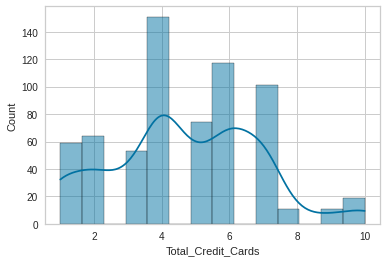

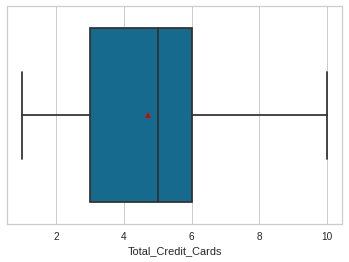

In [ ]:
# Use histplot and boxplot to see distribution for Total_Credit_Cards

sns.histplot(data=df,x='Total_Credit_Cards', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_Credit_Cards', showmeans=True)
plt.show()

Total_Credit_Cards

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Scaling - Done using ZScore towards the end of this section. Also, tried using Powertransformer, not much different result.

## Total_visits_bank

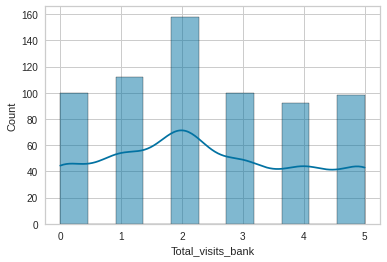

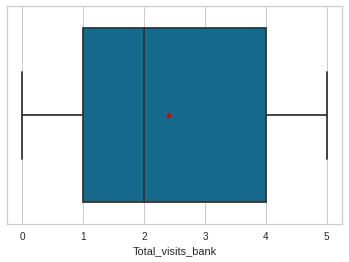

In [ ]:
# Use histplot and boxplot to see distribution for Total_visits_bank

sns.histplot(data=df,x='Total_visits_bank', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_visits_bank', showmeans=True)
plt.show()

Total_visits_bank

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Scaling - Done using ZScore towards the end of this section. Also, tried using Powertransformer, not much different result.

## Total_visits_online

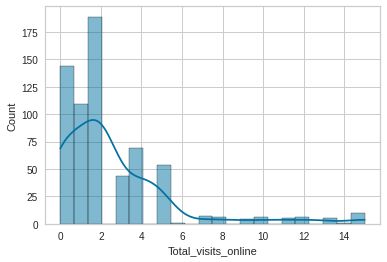

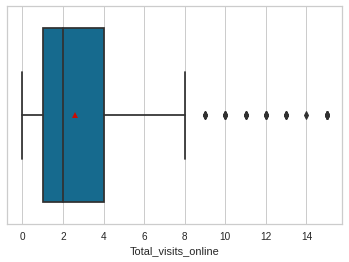

In [ ]:
# Use histplot and boxplot to see distribution for Total_visits_online

sns.histplot(data=df,x='Total_visits_online', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_visits_online', showmeans=True)
plt.show()

In [ ]:
# Calculate quantile and IQR values for Total_visits_online

Temp_v = 'Total_visits_online'
Temp_q1_Total_visits_online = df[Temp_v].quantile(0.25)
Temp_q2_Total_visits_online = df[Temp_v].quantile(0.5)
Temp_q3_Total_visits_online = df[Temp_v].quantile(0.75)
Temp_iqr_Total_visits_online = Temp_q3_Total_visits_online-Temp_q1_Total_visits_online

print('Median for' , Temp_v , 'is: ', Temp_q2_Total_visits_online)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Total_visits_online)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Total_visits_online)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Total_visits_online, '\n')

Median for Total_visits_online is:  2.0
1st Quartile for Total_visits_online is:  1.0
3rd Quartile for Total_visits_online is:  4.0
IQR for Total_visits_online is:  3.0 



In [ ]:
# Check on upper outliers using 1.5 IQR method

Temp_upper_whisker_Total_visits_online = Temp_q3_Total_visits_online + (1.5 * Temp_iqr_Total_visits_online)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Total_visits_online, '\n')

print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_Total_visits_online][Temp_v].count()

Upper Whisker for Total_visits_online is:  8.5 

Records above Upper Whisker are 



37

In [ ]:
#Check actual outlier records

df[df[Temp_v] > Temp_upper_whisker_Total_visits_online]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0
615,131000,9,1,10,1
616,96000,10,1,11,2
617,136000,8,0,13,0
618,121000,7,0,13,2
619,158000,7,0,13,0


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_Avg_Credit_Limit = PowerTransformer(method='box-cox')

# df[['Avg_Credit_Limit']] = pt_Avg_Credit_Limit.fit_transform(df[['Avg_Credit_Limit']])

Total_visits_online

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There were upper outliers. But on review of the records, records look legit. It is possible to have higher credit limit, especially with higher number of credit cards as well as higher income (not part of the dataset. In real scenario, this would have been verified from SME / Business.  Treating outliers is especially important for Clustering as model relies on distance measures. However, number of outliers are not significant, hence decided NOT to treat them.

* Missing values treatment - Not needed

* Feature Scaling - Done using ZScore towards the end of this section. Also, tried using Powertransformer, not much different result.

## Total_calls_made

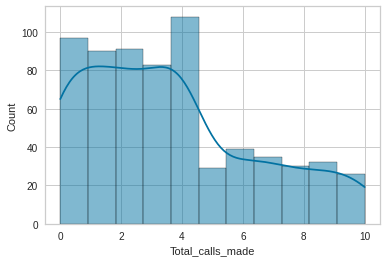

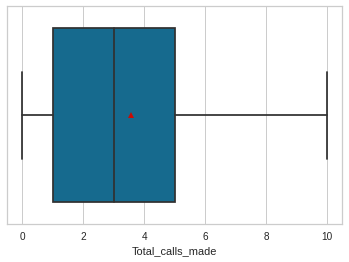

In [ ]:
# Use histplot and boxplot to see distribution for Total_calls_made

sns.histplot(data=df,x='Total_calls_made', kde=True)
plt.show()

sns.boxplot(data=df,x='Total_calls_made', showmeans=True)
plt.show()

In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_Total_calls_made = PowerTransformer(method='box-cox')

# df[['Total_calls_made']] = pt_Total_calls_made.fit_transform(df[['Total_calls_made']])

In [ ]:
# # Use histplots to see distribution for Total_calls_made

# sns.histplot(data=df_new,x='Total_calls_made', kde=True)
# plt.show()

# sns.boxplot(data=df_new,x='Total_calls_made', showmeans=True)
# plt.show()

Total_calls_made

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Scaling - Done using ZScore towards the end of this section. Also, tried using Powertransformer, not much different result.

## Feature Scaling

Feature Scaling are techniques to scale the features to the same scale, so that they all have a similar range. 
As clustering algorithms depend on some type of distance, it is important that features are on the same scale to avoid some features influencing the distances more than others.

In this case, although other than Avg_Credit_Limit, other features are more or less same scale, we will scale the data as a best practice. For other sections thereafter for clustering, we will use scaled data. Once clusters are derived, we will apply them to the original data to confirm that clusters look valid and balanced.

In [ ]:
# Scale the data using scipy.stats zscore

df_scaled=df.apply(zscore)

Data is now ready for Clustering models.

df_scaled - This data will be used for clustering models
df - Copies of this dataframe will be created for k-means and hierarchical and results of clustering will be populated in this original dataframe

Separate dataframes will be created for clustering with PCA.


# 10. K-means Clustering

Use K-Means clustering to group data based on their features. 

One of the drawback of k-means clustering is that we need to define number of clusters in advance. Let's determine the optimal number of clusters. We will do that using - 
* Cdist and average distortion
* Silhouette score
* Silhouette visualizer

## Find Optimal Number of Clusters - using cdist

Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9907072114489898
Number of Clusters: 6 	Average Distortion: 0.9429743088644272
Number of Clusters: 7 	Average Distortion: 0.9094073147007343
Number of Clusters: 8 	Average Distortion: 0.889432102400773


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

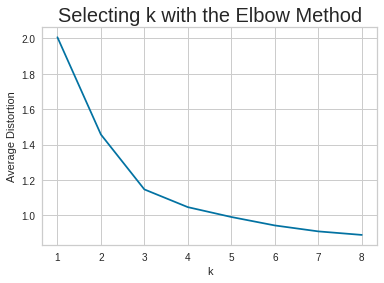

In [ ]:
#Use CDIST function to find average distortion, with several values of number of clusters. 

#Try with number of clusters between 1 & 8
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(df_scaled)  # Fit kMeans on the data
    prediction = model.predict(df_scaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

Average distortion will reduce as number of clusters increase. We get an idea of optimal number of clusters when the curve starts flattening. 

<b> In this case, looks like elbow is at 3, optimal value of number of clusters will be between 3 & 6.

## Find Optimal Number of Clusters - using WCSS (Within Cluster Sum of Squares)

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. Idea is to minimize this value to get optimal number of clusters.

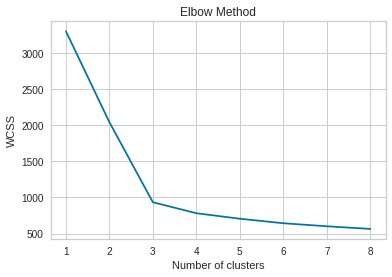

In [ ]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow is seen at value 3. WCSS does not decrease much after that. 
<b> In this case, looks like optimal value of number of clusters will be between 3 & 5.

## Find Optimal Number of Clusters - using Silhouette score

Let's use Silhouette score for checking on number of optimal clusters. More details about this score are mentioned in section for metrics above.

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726898791817692
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24861249523513856
For n_clusters = 8, silhouette score is 0.227290764936125


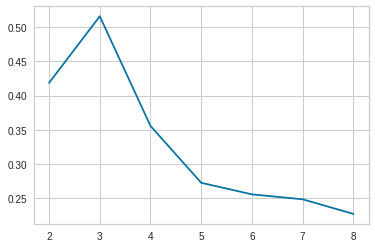

In [ ]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 9))  # Creating a list of range from 2 to 8
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((df_scaled))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

<b> Score is highest for value 3. But looks like there is an elbow at 4 & 5 clusters.

## Find Optimal Number of Clusters - using Silhouette visualizer

Let's use Silhouette Visualizer to visualie the cluster with various cluster values.

Below are the points that every cluster needs to satisfy for selecting the optimal K-value.

* There should be no negative silhouette coefficent value
* All the clusters should cross the avg silhouette score.
* All the clusters should have the different variations (width)
* All the clusters should have different silhouette score
* Also check for Avg Silhouette score, higher the better
Note

1. Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
2. Horizontal line refers to the Silhouette score of each cluster.
3. Dotted red line is an Average Silhouette score.

Lets try with different number of clusters, from 3 to 7.

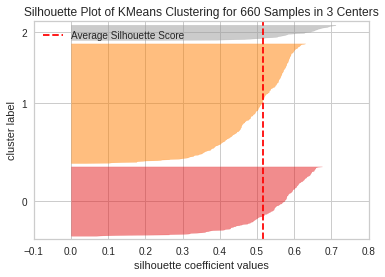

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

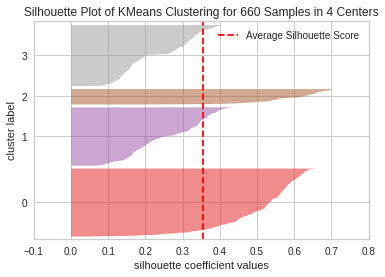

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

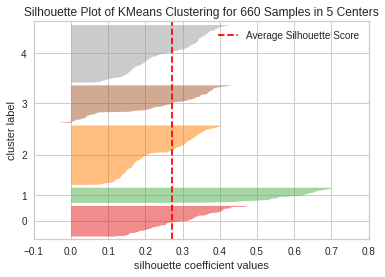

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

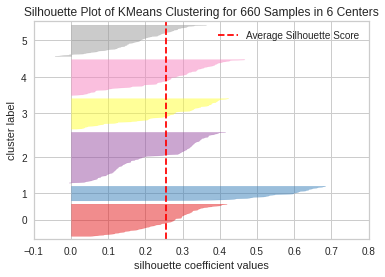

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

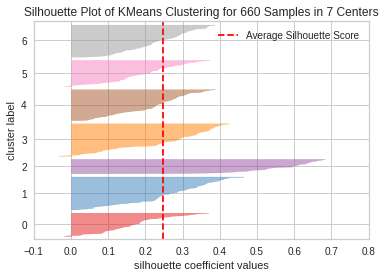

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()

Value of 5 or 6 seems to be right.
For both - 
* There is NO negative silhouette coefficent value
* All clusters cross the avg silhouette score.
* All clusters have different variations (width)
* All clusters have different silhouette score

With 7, score has started to be in negative for some clusters.

<b> Different methods above have indicated different number of clusters, between 3 & 6. This is where business input will be useful. For this exercie, let's use 5 for number of clusters and derive clusters.

## Derive Clusters

In [ ]:
#Create copy of original dataframe (NOT scaled) for KMeans clusters

df_kmeans = df.copy()

In [ ]:
#Let's create KMeans model with 5 clusters and fit on the scaled dataframe
# Use default values of the model, other than ones mentioned below

kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# adding kmeans cluster labels to the original dataframe

df_kmeans["K_means_segments"] = kmeans.labels_

## Clusters Profiling

Check the number of records in various clusters.

In [ ]:
# Number of records per cluster

df_kmeans['K_means_segments'].value_counts()

2    196
4    190
3    123
0    101
1     50
Name: K_means_segments, dtype: int64

Number of records range from 50 to 196. 4 out of 6 clusters have similar number of records.

In [ ]:
# Group by clusters and get average of features

df_kmeans_cluster_profile = df_kmeans.groupby("K_means_segments").mean()

In [ ]:
df_kmeans_cluster_profile.count()

Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [ ]:
df_kmeans_cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,12019.8020,2.4752,1.0000,3.4653,5.0099
1,141040.0000,8.7400,0.6000,10.9000,1.0800
2,36260.2041,5.5510,2.4949,0.9541,2.0612
3,12300.8130,2.3577,0.8780,3.6260,8.3984
4,31226.3158,5.4789,4.5158,1.0105,1.9368


In [ ]:
# Add another column to find out how many records per cluster

df_kmeans_cluster_profile["count_in_each_segment"] = (
    df_kmeans.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [ ]:
# let's display cluster profiles
df_kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12019.801980,2.475248,1.000000,3.465347,5.009901,101
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,36260.204082,5.551020,2.494898,0.954082,2.061224,196
3,12300.813008,2.357724,0.878049,3.626016,8.398374,123
4,31226.315789,5.478947,4.515789,1.010526,1.936842,190


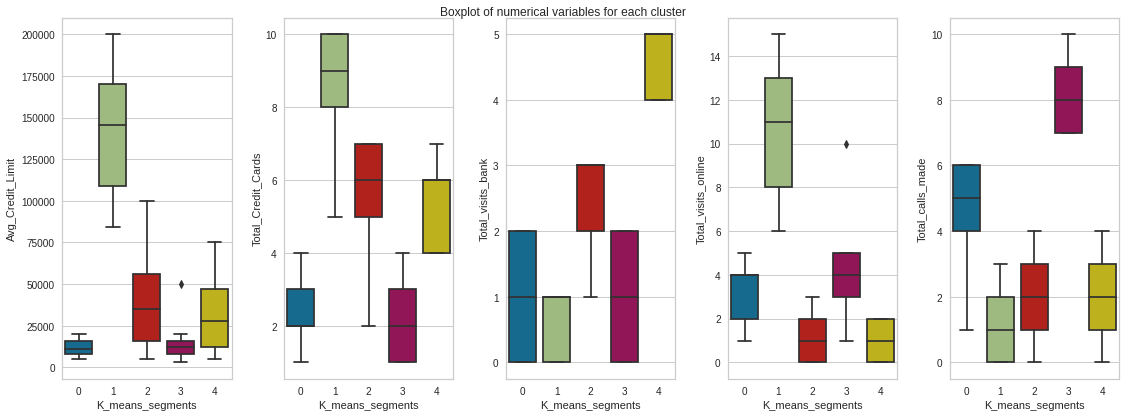

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
col_names = df_kmeans.columns
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[col_names[counter]], x=df_kmeans["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

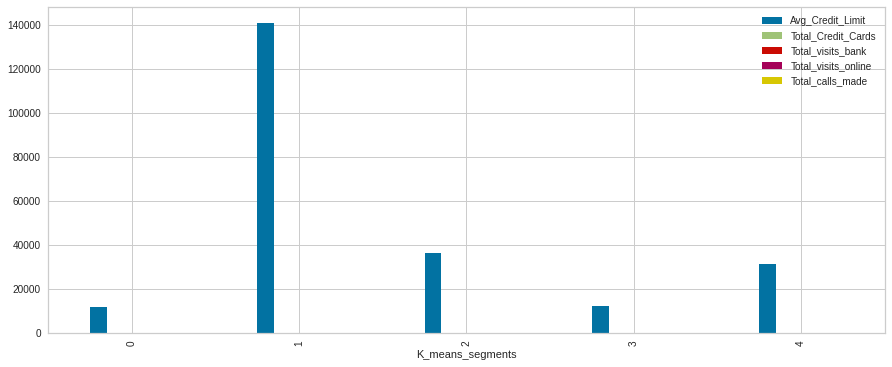

In [ ]:
df_kmeans.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<b> Cluster Profiles - Based on the box plots, clusters appear to have distinct properties on 4 features, there are no obvious significant overlaps.

Let's do hierarchical clustering now.

# 11. Hierarchical Clustering

Lets find number of clusters. The goal here is to identify a configuration of distance metric and linkage methods which gives the maximum correlation, and then proceed with that configuration to evaluate if it indeed gives us good clusters

## Find Optimal Number of Clusters - using Dendograms

In [ ]:
#Create copies of original dataframe (NOT scaled) for KMeans clusters

df_hmodel = df.copy()

In [ ]:
  # list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock","minkowski","jaccard"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]
#linkage_methods = ["single", "complete", "average", "weighted","ward","centroid","median"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm) # creates the clusters
        c, coph_dists = cophenet(Z, pdist(df_scaled)) 
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c: # stores the max value of the correlation so far
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

As best cophenetic corelation is observed for Euclidean distance and average linkage, lets evaluate different linkages for Euclidian distance only.

In [ ]:
  # list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","ward","centroid","median"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm) # creates the clusters
        c, coph_dists = cophenet(Z, pdist(df_scaled)) 
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c: # stores the max value of the correlation so far
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7415156284827493.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.8939385846326323.
Cophenetic correlation for Euclidean distance and median linkage is 0.8893799537016724.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


Euclidean distance and average linkage still has the best cophenetic correlation.

Let's create Dendograms

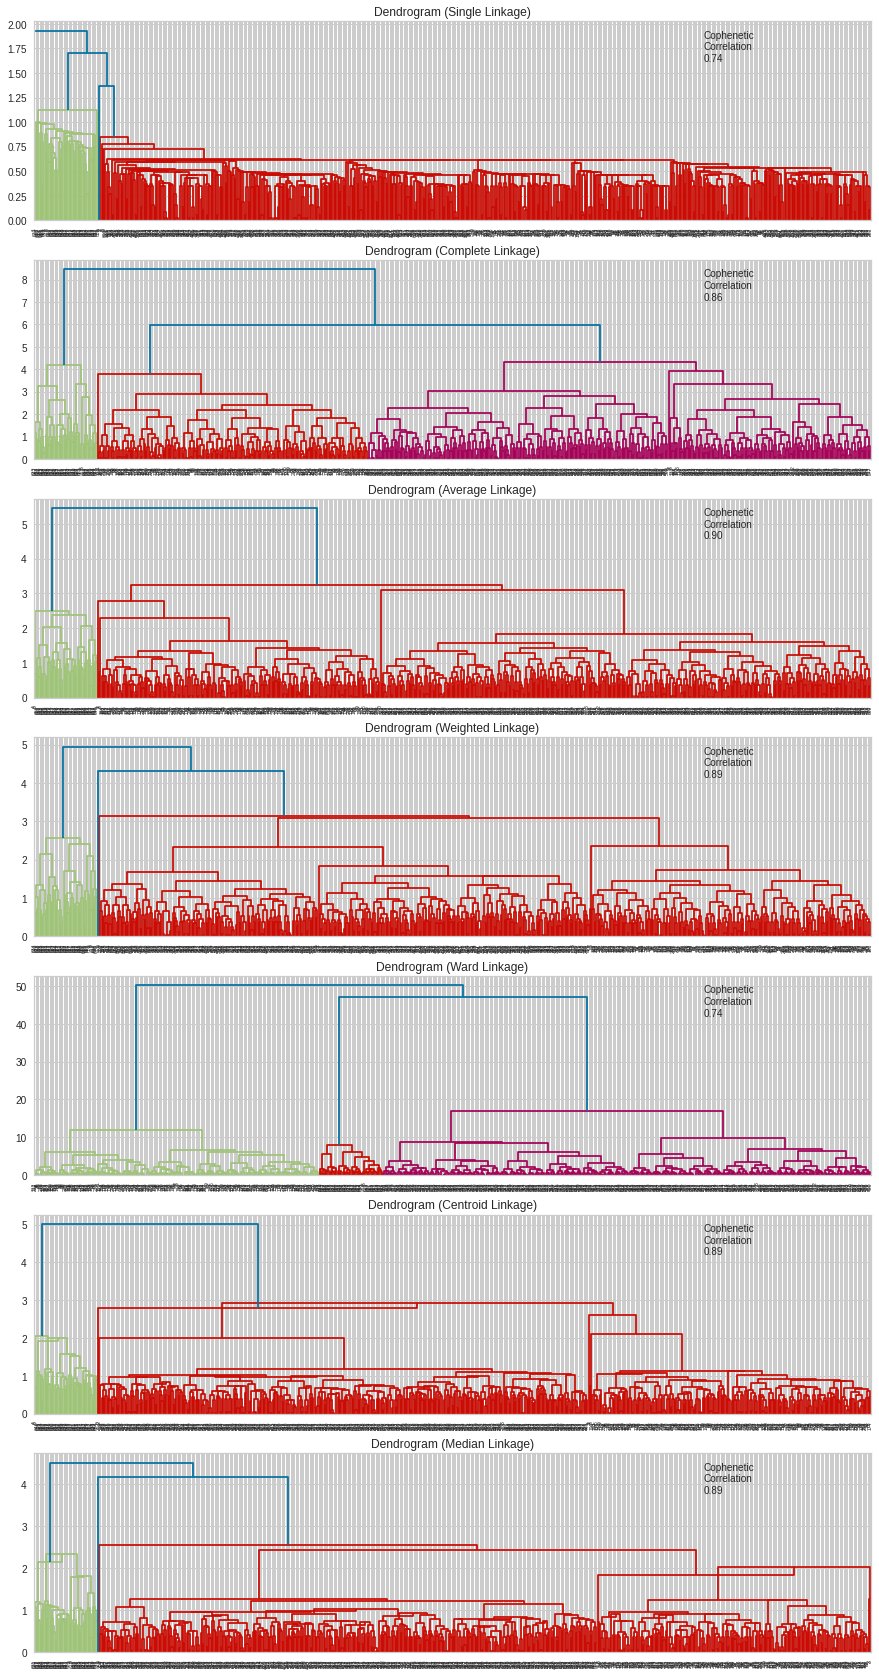

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted","ward","centroid","median"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i]) # combines those clusters using U shaped plots
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters. 

Let's create Dendogram using Euclidean distance and average linkage.

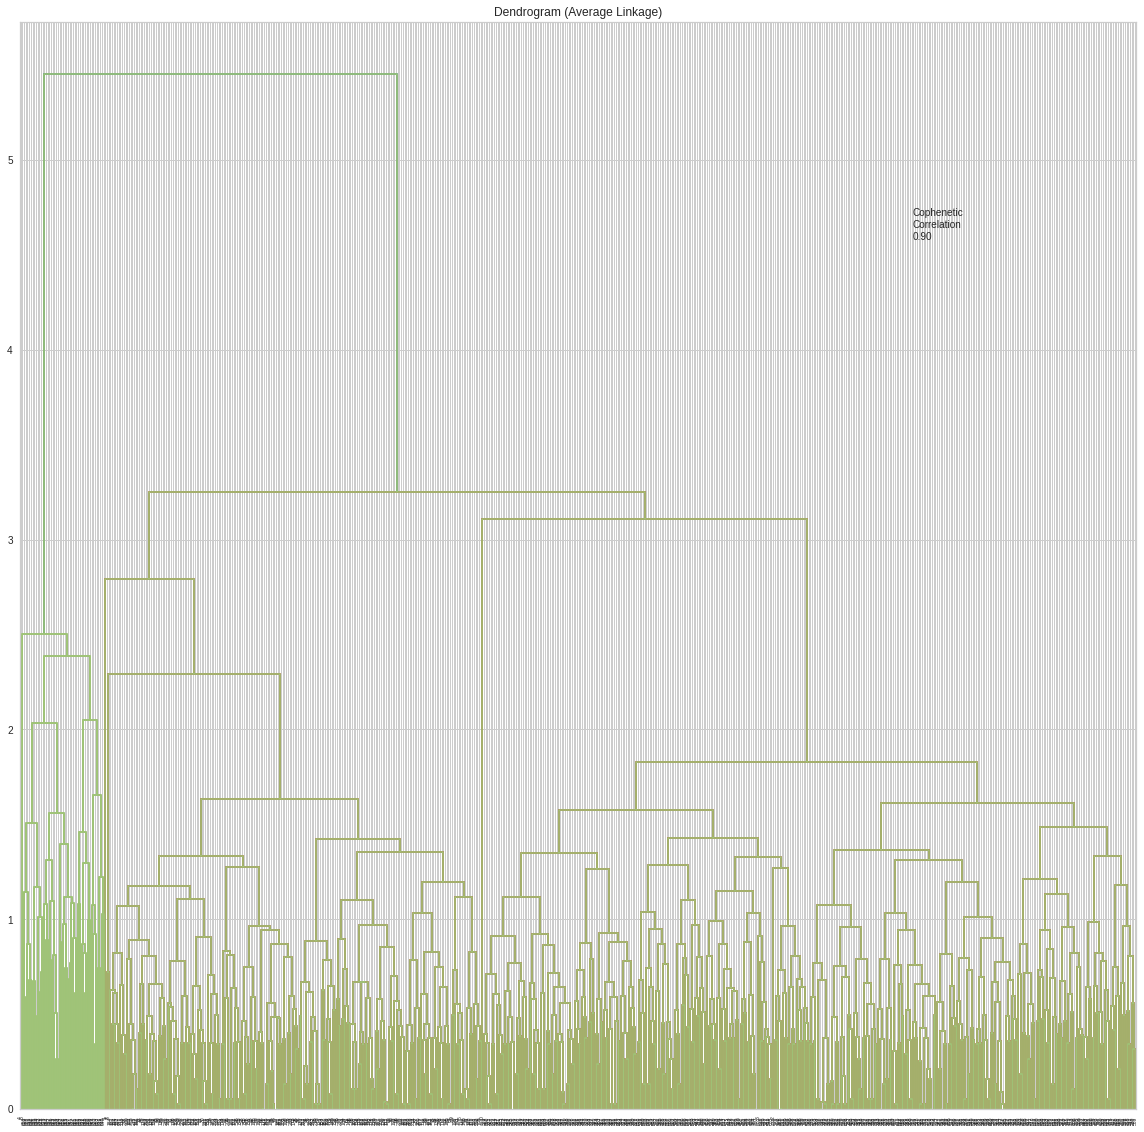

In [ ]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 20))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

It is subjective, but looks like we can traverse maximum height without cutting into clusters at the height of little above 2.5. That gives 5 clusters.

Let's create the model and do cluster profiling with 5 clusters.

## Derive Clusters

In [ ]:
# Create AgglomerativeClustering hierarchical model with 5 clusters and Euclidian distance and Average linkage, use scaled data

HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(df_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
# Link the clusters derived with the original dataframe

df_hmodel["hmodel_segments"] = HCmodel.labels_

In [ ]:
df_hmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   hmodel_segments      660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [ ]:
# Check value counts

df_hmodel['hmodel_segments'].value_counts()

2    386
1    222
0     50
3      1
4      1
Name: hmodel_segments, dtype: int64

## Clusters Profiling

In [ ]:
df_hmodel_cluster_profile = df_hmodel.groupby("hmodel_segments").mean()

In [ ]:
df_hmodel_cluster_profile.count()

Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [ ]:
df_hmodel_cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hmodel_segments,,,,,
0,141040.0000,8.7400,0.6000,10.9000,1.0800
1,12027.0270,2.4009,0.9324,3.5315,6.8739
2,33541.4508,5.5207,3.4922,0.9845,2.0104
3,100000.0000,2.0000,1.0000,1.0000,0.0000
4,50000.0000,3.0000,0.0000,10.0000,9.0000


In [ ]:
# Add number of records in each cluster

df_hmodel_cluster_profile["count_in_each_segment"] = (
    df_hmodel.groupby("hmodel_segments")["Total_Credit_Cards"].count().values
)

In [ ]:
# let's display cluster profiles
df_hmodel_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hmodel_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,12027.027027,2.400901,0.932432,3.531532,6.873874,222
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1
4,50000.000000,3.000000,0.000000,10.000000,9.000000,1


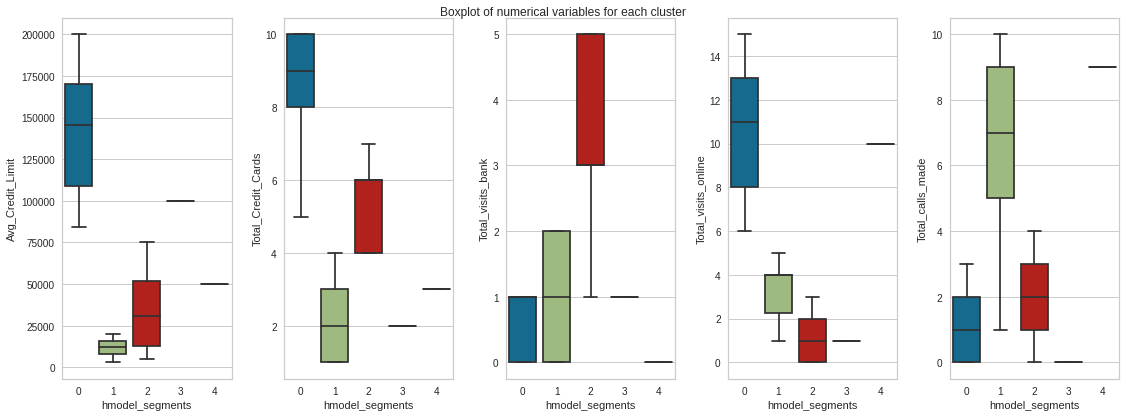

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
col_names = df_hmodel.columns
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[col_names[counter]], x=df_hmodel["hmodel_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

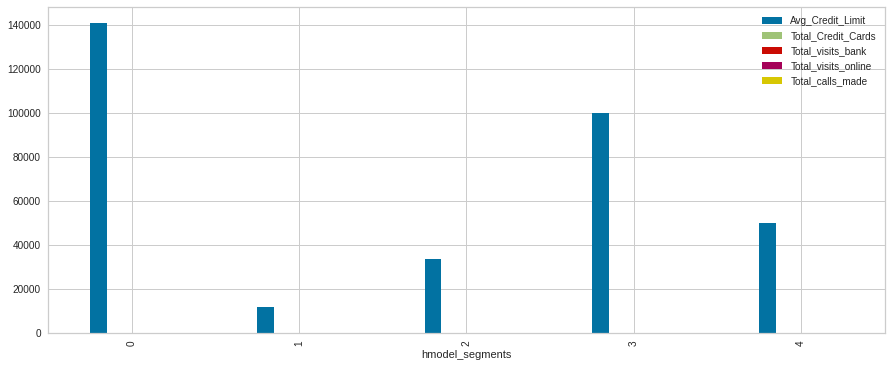

In [ ]:
df_hmodel.groupby("hmodel_segments").mean().plot.bar(figsize=(15, 6))

<b> Cluster Profiles - Based on the box plots, clusters appear to have distinct properties on 4 features, there are no obvious significant overlaps.

# 12. Clustering with Principal Component Analysis (PCA)

## Apply PCA on Scaled Data

In [ ]:
#Create copies of original dataframe (NOT scaled) for PCA

df_pca_hmodel = df.copy()
df_pca_kmeans = df.copy()

In [ ]:
pca = PCA(n_components=2, random_state=1)
pca.fit(df_scaled)

PCA(n_components=2, random_state=1)

In [ ]:
print(pca.explained_variance_ratio_)

[0.45736578 0.37426483]


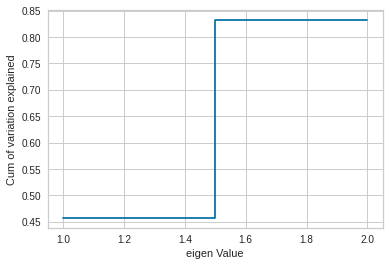

In [ ]:
plt.step(list(range(1,3)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

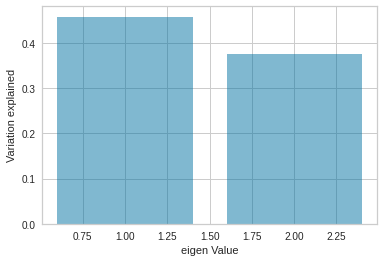

In [ ]:
plt.bar(list(range(1,3)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
df_pca = pca.transform(df_scaled)

In [ ]:
df_pca.shape

(660, 2)

## Create K-means Clustering model with PCA data

In [ ]:
#Let's create KMeans model with 5 clusters and fit on the scaled dataframe
# Use default values of the model, other than ones mentioned below

kmeans_pca = KMeans(n_clusters=5 , random_state=1)
kmeans_pca.fit(df_scaled)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# adding kmeans cluster labels to the original dataframe

df_pca_kmeans["K_means_segments"] = kmeans_pca.labels_

Check the number of records in various clusters.

In [ ]:
# Number of records per cluster

df_pca_kmeans['K_means_segments'].value_counts()

2    196
4    190
3    123
0    101
1     50
Name: K_means_segments, dtype: int64

Number of records range from 50 to 196. 

In [ ]:
# Group by clusters and get average of features

df_pca_kmeans_cluster_profile = df_pca_kmeans.groupby("K_means_segments").mean()

In [ ]:
df_pca_kmeans_cluster_profile.count()

Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [ ]:
df_pca_kmeans_cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,12019.8020,2.4752,1.0000,3.4653,5.0099
1,141040.0000,8.7400,0.6000,10.9000,1.0800
2,36260.2041,5.5510,2.4949,0.9541,2.0612
3,12300.8130,2.3577,0.8780,3.6260,8.3984
4,31226.3158,5.4789,4.5158,1.0105,1.9368


In [ ]:
# Add another column to find out how many records per cluster

df_pca_kmeans_cluster_profile["count_in_each_segment"] = (
    df_pca_kmeans.groupby("K_means_segments")["Total_Credit_Cards"].count().values
)

In [ ]:
# let's display cluster profiles
df_pca_kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12019.801980,2.475248,1.000000,3.465347,5.009901,101
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,36260.204082,5.551020,2.494898,0.954082,2.061224,196
3,12300.813008,2.357724,0.878049,3.626016,8.398374,123
4,31226.315789,5.478947,4.515789,1.010526,1.936842,190


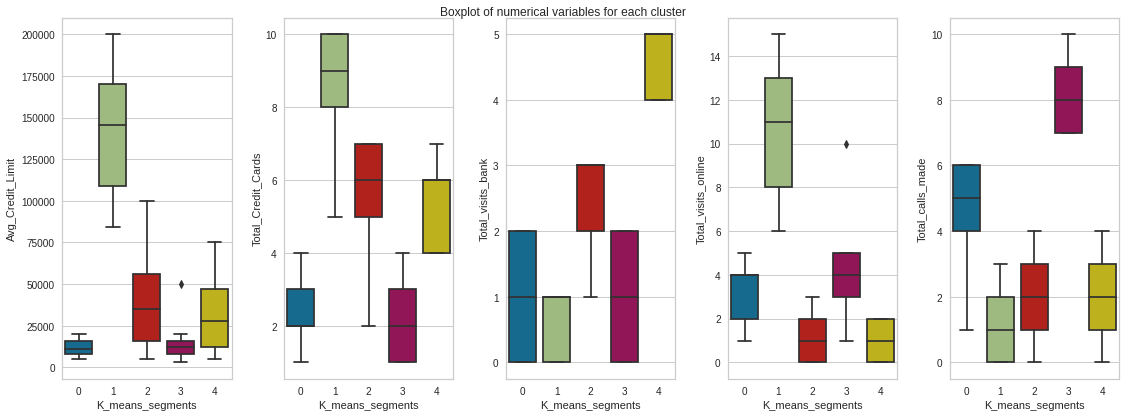

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
col_names = df_kmeans.columns
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df_pca_kmeans[col_names[counter]], x=df_pca_kmeans["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Create Hierarchical Clustering model using PCA data

In [ ]:
# Create AgglomerativeClustering hierarchical model with 5 clusters and Euclidian distance and Average linkage, use scaled data

HCmodel_pca = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel_pca.fit(df_pca)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
# Link the clusters derived with the original dataframe

df_pca_hmodel["hmodel_segments"] = HCmodel_pca.labels_

In [ ]:
df_hmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   hmodel_segments      660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [ ]:
# Check value counts

df_hmodel['hmodel_segments'].value_counts()

2    386
1    222
0     50
3      1
4      1
Name: hmodel_segments, dtype: int64

In [ ]:
df_hmodel_cluster_profile = df_hmodel.groupby("hmodel_segments").mean()

In [ ]:
df_hmodel_cluster_profile.count()

Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [ ]:
df_hmodel_cluster_profile.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
hmodel_segments,,,,,
0,141040.0000,8.7400,0.6000,10.9000,1.0800
1,12027.0270,2.4009,0.9324,3.5315,6.8739
2,33541.4508,5.5207,3.4922,0.9845,2.0104
3,100000.0000,2.0000,1.0000,1.0000,0.0000
4,50000.0000,3.0000,0.0000,10.0000,9.0000


In [ ]:
# Add number of records in each cluster

df_hmodel_cluster_profile["count_in_each_segment"] = (
    df_hmodel.groupby("hmodel_segments")["Total_Credit_Cards"].count().values
)

In [ ]:
# let's display cluster profiles
df_hmodel_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hmodel_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,12027.027027,2.400901,0.932432,3.531532,6.873874,222
2,33541.450777,5.520725,3.492228,0.984456,2.010363,386
3,100000.000000,2.000000,1.000000,1.000000,0.000000,1
4,50000.000000,3.000000,0.000000,10.000000,9.000000,1


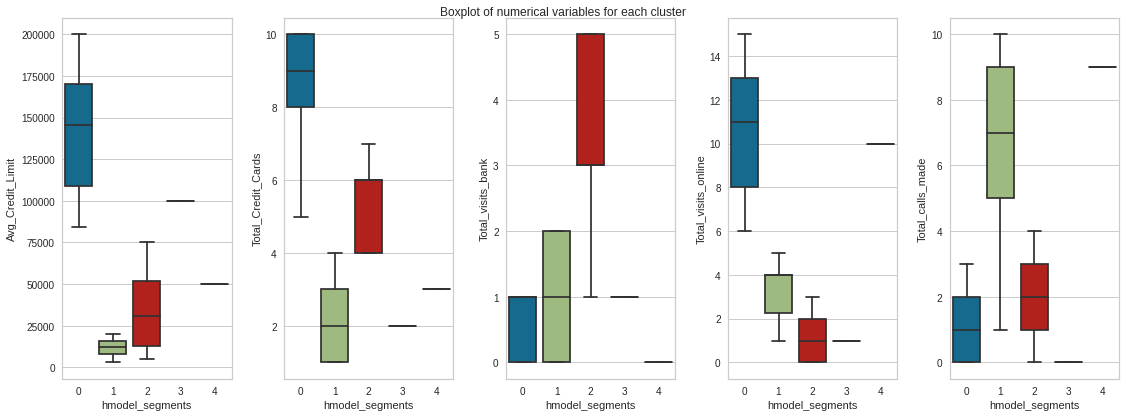

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
col_names = df_hmodel.columns
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[col_names[counter]], x=df_hmodel["hmodel_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

# 13. K-means vs Hierarchical Clustering

Compare clusters obtained from K-means and Hierarchical clustering techniques

  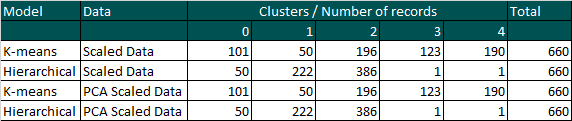


Comparison of 4 models created without PCA and with PCA is displayed above. 


<b> With PCA, there was no difference in the clustering. Number of features were very limited any way, so there was not much scope for Dimensionality Reduction using PCA.

Records are better spread with k-means. In Hierarchical model, there are 2 clusters with ony 1 customer record in it.

Let's compare cluster profiles for Hierarchical and kmeans with scaled data. 

In [ ]:
df_hmodel_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hmodel_segments,,,,,,
0,141040.0000,8.7400,0.6000,10.9000,1.0800,50
1,12027.0270,2.4009,0.9324,3.5315,6.8739,222
2,33541.4508,5.5207,3.4922,0.9845,2.0104,386
3,100000.0000,2.0000,1.0000,1.0000,0.0000,1
4,50000.0000,3.0000,0.0000,10.0000,9.0000,1


In [ ]:
# Checking records in clusters 3 & 4

df_hmodel[(df_hmodel['hmodel_segments'] == 4)  | (df_hmodel['hmodel_segments'] == 3)]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,hmodel_segments
0,100000,2,1,1,0,3
1,50000,3,0,10,9,4


In [ ]:
df_kmeans_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12019.8020,2.4752,1.0000,3.4653,5.0099,101
1,141040.0000,8.7400,0.6000,10.9000,1.0800,50
2,36260.2041,5.5510,2.4949,0.9541,2.0612,196
3,12300.8130,2.3577,0.8780,3.6260,8.3984,123
4,31226.3158,5.4789,4.5158,1.0105,1.9368,190


In [ ]:
# Checking records in clusters 3 & 4 for K-means

df_kmeans[(df_kmeans['K_means_segments'] == 4)  | (df_kmeans['K_means_segments'] == 3)].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
count,313.0000,313.0000,313.0000,313.0000,313.0000,313.0000
mean,23789.1374,4.2524,3.0863,2.0383,4.4760,3.6070
std,19554.1722,1.9074,1.8901,1.6540,3.4176,0.4892
min,3000.0000,1.0000,0.0000,0.0000,0.0000,3.0000
25%,10000.0000,3.0000,1.0000,1.0000,1.0000,3.0000
50%,15000.0000,4.0000,4.0000,2.0000,3.0000,4.0000
75%,36000.0000,6.0000,5.0000,3.0000,8.0000,4.0000
max,75000.0000,7.0000,5.0000,10.0000,10.0000,4.0000


Hierarchical and kmeans with scaled data - 

1. Clusters 0 , 1 are very similalr with both models in terms of features, except that 0 & 1 are swapped. That is, Cluster 0 in Hierarchical model is similar to Cluster 1 in K-means and vice-a-versa. Number of records however are very different in 1 one of the pairs (hmodel cluster 1 = 222 , kmeans cluster 0=101).
2. Cluster 2 has similar mean feature values, however number of records are very different. 386 in Hierarchical vs 196 in kmeans.
3. Clusters 3 & 4 are very diferent. With Kmeans, records are more evenly distributed between clusters 2,3 & 4. This appears correct based on how mean values for features are. So, Kmeans intuitively looks more correct than Hierarchical. 
4. In real world scenario, clustering can not be determined solely based on the model, business inputs are essential.

<b><font color = "blue" size=5> Considering above, we will use K-Means model as a recommended model and use clusters derived using that model.

# 14. <b><font color="blue">Actionable Insights & Recommendations</b>

<b>Purpose of this exercise is to identify different segments in the existing customer records based on their features in the dataset and provide recommendations to the bank on how to better market to and service these customers.

In [ ]:
# let's display cluster profiles of the recommended model
df_kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12019.801980,2.475248,1.000000,3.465347,5.009901,101
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,36260.204082,5.551020,2.494898,0.954082,2.061224,196
3,12300.813008,2.357724,0.878049,3.626016,8.398374,123
4,31226.315789,5.478947,4.515789,1.010526,1.936842,190


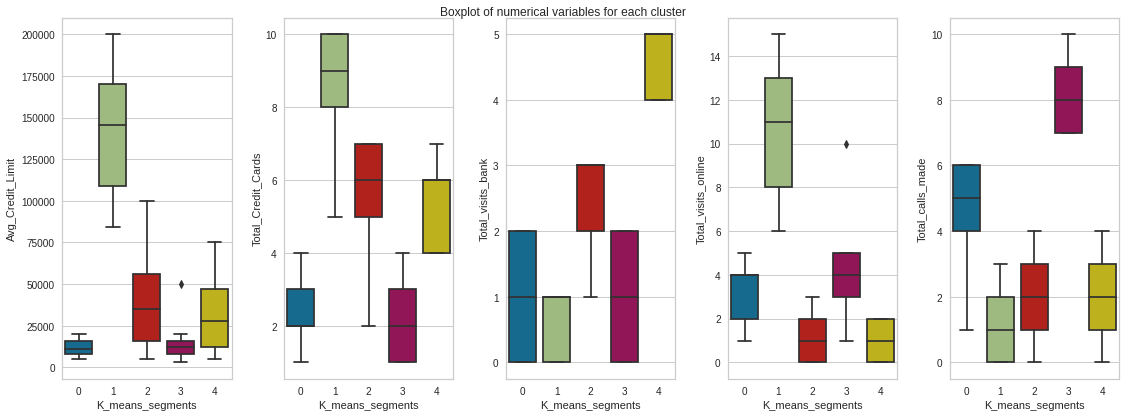

In [ ]:
# let's display cluster profiles of the recommended model
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
col_names = df_kmeans.columns
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[col_names[counter]], x=df_kmeans["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<b><font color ="blue" size=5> Characteristics of Clusters - 

Overall, clusters seem non-overlapping enough and are fairly distince, considering all 5 features.

Cluster 0:
  * 101 customers in the cluster
  * Lower end of the Average Credit Limit for customers
  * Lower end of total number of credit cards, 1 to 4
  * Total calls made are more compared to customers in most other clusters other than Cluster 3
  * Calls seems to be more preferred by these customers over bank or online visits

Cluster 1:
  * 50 customers in the cluster
  * Highest range as well as higher values for the Average Credit Limit
  * Higher number of credit cards, Total number of credit cards between 3 to 10, 75% have more than 8 credit cards
  * Lower number of bank visits as well as calls
  * Highest use of online visits

Cluster 2:
  * 196 customers in the cluster, <b> this is the biggest cluster by number of customers </b>
  * Second highest range for Avg Credit Limit, after Cluster 1
  * Number of credit cards range from 1 to 7
  * Bank visits is the preferred way of contact
  
Cluster 3:
  * 123 customers in the cluster
  * Lower end of the Average Credit Limit for customers
  * Lower end of total number of credit cards, although the range is 1 to 4 cards
  * Calls is the preferred method of contact
  * Similar to Cluster 0

Cluster 4:
  * 190 customers in the cluster
  * Lower end of the Average Credit Limit for customers
  * Total number of credit cards in the middle range, 4 to 7 cards
  * Highest number of bank visits, calls or online visits are less preferred

<b><font color ="blue" size=5>Recommendations to AllLife Bank based on the Clustering - </b>

1. In real world scenario, clustering can not be determined solely based on the model and model metrics, business inputs are essential.

2. Cluster 0 - Much better than cluster 4, but these can be educated more towards online services. More credit cards can be marketed.

3. Cluster 1 - Customers have all the characteristics (based on the dataset provided) that are desirable. These are higher credit limit, higher number of credit cards, lower cost of maintenance as they make less calls and lesser bank visits. Encourage more customers from this cluster to use more online services. As seen in EDA as well, more the number of visits online, lesser number of bank visits.

4. Cluster 2 - Same recommendation as Cluster 4 below.

5. Cluster 3 - Same recommendation as cluster 0 above. More credit cards to be marketed and educate for online services.

6. Cluster 4 - Highest use of bank visits. This is costly for the bank. Encourage, educate them to avail same services online or at least on call.This will be beneficial for the bank.

